# 📊 SHAP Interpretation Report: LSTM
This notebook provides a post-hoc explanation of the model's predictions using **gradient** SHAP.

---

### 🔍 What are SHAP Values?
**SHAP (SHapley Additive exPlanations)** decomposes a model's prediction into the contribution of each individual feature. 
* **Magnitude:** A larger absolute SHAP value means the feature had a bigger impact on the output.
* **Direction:** A positive SHAP value means the feature pushed the prediction *higher*, while a negative value pushed it *lower*.
* **Interpretation:** For any given sample, the sum of SHAP values plus the base value (average model output) equals the actual model prediction.

### 🧪 Methodology
**Gradient SHAP** is designed for deep learning models. It explains predictions by computing the gradients of the output with respect to the inputs, integrated over various reference points (baselines). It is highly efficient for neural networks.

---

### 📋 Metadata
**Model Architecture:** LSTM  
**Analysis Context:** timeseries  
**Dataset Scope:** whole

---


In [1]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Data provided by the explainer
all_shap_dict = {0: [[[[0.00013237292358223113], [0.00020125440144409023], [1.2882245442069548e-05], [0.00022814046325216], [1.0546260827520042e-05], [0.00012054377224558995], [0.00491342641348986], [2.9325512731254445e-05], [-0.00016762808207415936], [-0.00016085714694905956], [-0.0009931736926831456], [0.007340406417198016]], [[-0.0010378424784297233], [-0.0018057075188664614], [0.00020300764640823383], [0.0009622641058762666], [0.00013692256825518354], [-0.0006176773570247981], [0.008343631745467477], [0.0009183896248309952], [0.0012807590947905472], [-0.00035143004816612513], [-0.001291540043838465], [0.013519153755500682]], [[0.0015960279917116753], [-0.0014134935428856403], [-0.001216918220754873], [-0.0005460451975242185], [-0.0004045060442414957], [0.000592372904228723], [0.022871157666852517], [0.0018026961396892438], [-0.0022938896697058085], [0.0005566909804758379], [0.005695046122490146], [0.007490734535795692]], [[0.015331122568673559], [0.04883381723171282], [0.014821967157630149], [-0.011719074305761093], [-0.0010141471497966555], [0.005617121080025581], [0.020374945621347885], [-0.002605939434677906], [-0.0004040524621507092], [-0.0018547306319681336], [-0.01815835813707849], [0.027039992891026748]], [[-0.006472615698434217], [-0.10071466983528246], [-0.012244105495284006], [0.0010282583230883117], [0.0017907410259692944], [0.037043657816782316], [0.033293233835649284], [-0.010625585370020625], [-0.0023420695276809185], [-0.00984032019653114], [0.012753470937835283], [0.022941460584740624]], [[0.1709839655928693], [0.21290307892263238], [0.0182594980048747], [-0.015099201440231884], [-0.026750762289686324], [0.03343738492725288], [0.06617256462719594], [0.04016018700807813], [-0.025929471432556275], [0.010263211915213193], [0.01597810143052719], [0.0250918529867684]]], [[[0.000580387485221609], [0.0018698953839058094], [0.00027816001241857307], [0.0013168983192199657], [8.396219499485686e-05], [0.00041744776640122145], [0.0022347851617559858], [-0.0007101092733998812], [-0.00020707718289604115], [-0.00026709607504900773], [-0.004048804133608721], [0.011697570618809409]], [[-0.008347248315052909], [-0.01039940986683861], [0.0021993034921743153], [0.0038730250065200362], [0.0009233275083468037], [-0.0027705949057680677], [-0.01202612349821122], [0.0011467104390143568], [0.006730188097356207], [-0.0019091565592038824], [-0.006773412312092028], [0.029550424154878116]], [[0.021263928111606812], [-0.006287067741740418], [-0.010136724312035817], [0.006585231184826217], [-0.002862395194990111], [0.018437798384884206], [0.04060224544638972], [0.0018047538038538308], [-0.0014288871105635802], [-0.0030997409530991006], [-0.004735748464779174], [-0.03353051688004055]], [[0.07666521533952757], [0.20119926840779845], [0.03731002978064802], [-0.03757623990665437], [-0.012875703364724427], [0.004403091930370153], [0.03207700590306065], [0.012965646966138847], [-0.005646582730444421], [0.010485177557289772], [-0.025954889782845214], [0.04755541935512036]], [[-0.13257711644763023], [-0.30555367566440167], [-0.009372673348046952], [0.03373192473277841], [0.02715103174407461], [-0.00048597952300409765], [0.0037794602356302338], [-0.026975466865734498], [0.03295935269460031], [-0.020614490967014114], [0.0023750314327122294], [0.07699288366603359]], [[0.44226559760535694], [0.4239930952272789], [0.04358716891647327], [-0.07333344197847701], [-0.05401443762412727], [0.03166736121767809], [0.044566103185734285], [0.046080139601479324], [-0.04849178067483668], [0.009666718699680088], [0.00884542903684968], [-0.07799452107592346]]], [[[0.002150370495088475], [0.004565876634392615], [0.0024996534611428137], [0.005529377445057644], [-0.0004385784585501545], [0.0013506940122956059], [0.006057828345397467], [-0.00221584894287123], [0.0015236102147365804], [-0.002905665336704095], [-0.013917123119520553], [0.013933435360798975]], [[-0.02946909432255754], [-0.06877729617412501], [-0.001767317203006579], [0.0010814506817326125], [0.002129913187222433], [-0.014655369392639617], [-0.012541346727304628], [-0.0061041604615804925], [0.00602539843237189], [-0.0019588149987987014], [-0.0018991333223165494], [0.018207830075709457]], [[0.08820784919655603], [0.09649167427646138], [-0.0028910262662863217], [-0.013352464092948123], [-0.01585484202392999], [0.05420182110293068], [0.057409735643291195], [0.011500225799894136], [-0.014297358883135498], [4.906857835743406e-05], [0.0021217078529096297], [-0.0023681114849991467]], [[-0.016048723503117833], [0.04858103994398453], [0.03925060687704322], [-0.009979180364199581], [-0.011762045173037545], [0.0006150088562289239], [0.00809292951468135], [0.016705123032164468], [0.009000071620763009], [0.00018418202519076751], [-0.017101282297403233], [0.10981769681497916]], [[-0.10997318323438023], [-0.23851918059470065], [-0.005787676299183111], [0.006332733105602962], [0.012995115547435671], [0.00308462707171248], [0.03310178578858929], [-0.060533735277481585], [0.033889893083044215], [-0.023366161046321318], [-0.035325404469269864], [0.06749018405414446]], [[0.5138393991199567], [0.7127187163341675], [0.07906469823364663], [-0.0740582403461036], [-0.06519980303747835], [0.060148298173003135], [-0.00025962503115621816], [0.0710444451347664], [-0.04792040518531971], [0.009467408329293471], [-0.0025987937994604265], [-0.09137682619412045]]], [[[-0.004440641326754531], [-0.0015667390788437101], [0.0036526216057069416], [0.0028863852359152188], [0.0005271993999078104], [-0.003834791308904065], [-0.0019386909668452509], [-0.0005111992900312147], [0.0024460766864769037], [-0.0008331555948187176], [-0.005960180075107076], [0.009530411627829291]], [[-0.005626922034489052], [-0.03986844582801047], [-0.00430422628696188], [0.006976950096654564], [0.0018704303887918524], [0.0033793809334862267], [0.014218858551760945], [-0.005395433060929163], [0.0019602209682187876], [-0.002716908244647045], [-0.00161583538261585], [-0.004113605484435029]], [[0.05083325767906512], [0.08399254140730963], [0.011544329671442864], [-0.01208867160497345], [-0.01152407209352003], [0.008842254484539435], [0.022856562317144724], [0.010952087300369305], [-0.015440084089025894], [0.0054839380325208765], [0.007213948584945378], [0.010215877003735037]], [[-0.07491420513195318], [-0.08985438947742636], [0.013897881227486631], [0.013666570709012369], [0.009068800969680449], [-0.0013299421506370917], [0.005684278104677972], [0.007239486201912122], [0.01712942672919597], [-0.004944188250103979], [-0.00634898221655841], [0.08382770433329972]], [[0.0870634041783786], [0.055244852729884136], [0.0179184978858085], [-0.03841844214542926], [-0.022181024068608935], [0.015865073719116638], [0.02679413393943129], [-0.04525445936489568], [-0.0004771580020203242], [-0.011073104565827744], [-0.02773933940075234], [-0.027865189583114396]], [[0.26468918206312364], [0.33798740228346874], [0.032988427180354433], [-0.00211785006975467], [-0.03146839980676574], [0.009318876944986279], [-0.03595483680208845], [0.05999447700552572], [-0.0302379200624479], [0.011709911105772526], [0.021867176247652907], [0.03992321482121901]]], [[[0.02384043573515298], [0.04362040499615392], [0.0044772300700115526], [-0.004240538770054441], [-0.003847060414588438], [0.006542450344428892], [0.01399198341919702], [0.005754975332771525], [-0.0040824370413277], [0.0021748985510294445], [-0.0011153946519533618], [0.0030841046591144326]], [[-0.03060884694538838], [-0.041308744742953346], [0.009323334717508335], [0.0057525658279794925], [0.0030559379769328153], [-0.0030391251092416684], [0.0034938413415164273], [-0.0010901579357582216], [0.007889470559660819], [-0.002875319533396673], [-0.0030776336293269007], [0.030500716604193664]], [[0.04340112611543209], [0.023262088950364825], [0.01070145472824318], [-0.0002310226486185585], [-0.008112137721389056], [0.0035691042054023904], [0.013298672606302386], [-0.008696572442096243], [-0.0020089916910480533], [-0.004106378040426908], [-0.011059606214866234], [-0.009075924804372859]], [[0.03988367898081165], [0.07217462014325378], [0.01890253360817862], [-0.016668112976093667], [-0.0038813372561693478], [0.006971920312968074], [0.013505927484015124], [0.02025117684816822], [-0.01144411930153436], [0.00334559039971985], [0.013517826436506999], [0.040870187962744865]], [[-0.06987210439188597], [-0.2423080879207846], [-0.01908279611214856], [0.022369962814449033], [0.013229247067434464], [6.466335640693345e-05], [0.002836101985060639], [-0.009950390246418446], [0.010962402200639843], [-0.010348177240779832], [0.002857563511943158], [0.08687783570250594]], [[0.34095869130871465], [0.3197513761892314], [0.05424087004269335], [0.00720060120678603], [-0.03973688265749165], [0.008663269471416421], [-0.09612424624574578], [0.05484937495604434], [-0.027475766776151635], [0.005525232329083684], [0.014230199407828539], [0.018000058316367983]]], [[[-0.004467481164255009], [-0.002099009525451864], [0.004763104079733918], [0.003694950720428776], [0.00011584225231054204], [-0.0007521473384188748], [0.0018759038835082804], [0.0013048330061067618], [0.0012694898045192086], [-0.0003743502877701638], [-0.0014560230982750613], [0.009273468877983115]], [[-0.0031683711917215866], [-0.014669948416779661], [0.003212406684052716], [0.0011569180093615647], [-0.0007356652467225889], [0.0004615636261571246], [0.005883003952539661], [-0.004010734946562291], [0.0014527552264410964], [-0.0017420836554527348], [-0.003436017073669948], [0.007470445025873589]], [[0.04129066488839337], [0.054879886696909706], [0.010064763461986558], [-0.0020734074875376858], [-0.005449798054560775], [0.007080153808445167], [-0.0004273073064804868], [0.011775136703882536], [-0.00859508786550988], [0.0015452756608437001], [0.006284447415361065], [0.008788771401283693]], [[-0.03404639400603637], [-0.08656081245034798], [0.00457760036205075], [0.022704187193201424], [0.007493856185703205], [-0.00015147147717661831], [0.002733418544681258], [0.0044831027776561705], [0.005380703105899892], [-0.002327936272490949], [0.000817046030035142], [0.05814304226575275]], [[0.05223543379829663], [0.004198643214843176], [-0.005319430341554965], [-0.003102459134229544], [-0.01461061893560315], [0.0008545813369443342], [-0.06132107904463908], [0.018005460862714363], [-0.0057577250510261165], [0.001209330174754869], [0.004324635890372054], [0.06468534595099466]], [[0.08012797834518214], [0.14965002342899192], [0.06388375730992692], [0.030430967402845625], [-0.019684040209940044], [0.020085269900797075], [-0.11663588830754311], [0.030665096633505185], [-0.012583743598381046], [0.004512046029426323], [0.014720735233835196], [0.040922227546759095]]], [[[-0.0040379875732886455], [-0.006013727930098812], [0.0007381568116150111], [0.0039024168772821967], [0.0003849218740035003], [0.00011021194137120396], [0.0013505225722934314], [0.0009159475034156865], [0.0014106574646048165], [-0.0007793654562733805], [-0.0007030795158875522], [0.007956956147242136]], [[0.0012367818261981292], [-0.0021876008776395206], [0.0012871062353101963], [-0.0020744907395601284], [-0.0027046602603534513], [0.0013583179473475738], [0.0015950603163302631], [7.048295255517834e-05], [-0.0003736601388842043], [-0.000761354786511009], [-0.0006029504854778578], [0.011923764535702706]], [[0.010745611343644428], [-0.0047592121943433405], [0.0003454767357578681], [0.004307834010595315], [-0.0015533372264298867], [0.0018305634524397752], [-0.006253744508890206], [0.0057636576473157255], [-0.0021376985408688856], [-0.00016167266439874275], [0.0028296092312535357], [0.02651908005357623]], [[0.007220782027150008], [-0.00724692045350447], [0.011697253629453324], [0.007685903582762586], [-0.004631570703327645], [0.0016180803005780395], [-0.021732873376844278], [0.007783937076770977], [-0.0002725335710933687], [-0.0013070660176023971], [-0.001536695642196586], [0.05937677048795184]], [[-0.004244690760532138], [-0.040119602575061884], [-0.013148485621578457], [0.005089216372864474], [-0.007728475843320533], [-0.008029452603450277], [-0.09396613429203857], [0.020855002977490496], [-0.001504137201544073], [0.001828695421334609], [0.010144536367528705], [0.09024103572350799]], [[0.09026783759551658], [0.13534619688690075], [0.032328613019409834], [0.011624666741904512], [-0.023646918954762914], [0.02409916031426518], [-0.17401042921364404], [0.02026646777085099], [-0.006056582529965753], [0.0033770562346608244], [0.0009376756893028408], [0.02936359657197731]]], [[[0.0014443820732772722], [0.0011358387435755997], [0.0011242051775330179], [0.0011490357151368207], [-0.0006419788564759872], [0.000620322298317905], [0.0008494262028051757], [0.0017119376879579469], [-0.00048260033371961967], [-0.00015277090017868424], [0.00042443192045641087], [0.006639407979615299]], [[-0.004042853654279123], [-0.013638686488713919], [0.0004863363865173386], [0.005296359854861213], [-7.639501324838118e-05], [8.440932844399281e-05], [-0.002154517058572345], [0.0033645827025149655], [0.00017815296233888428], [-0.00043663974705400287], [0.0009985951380179282], [0.014858294116501749]], [[0.009949508860305172], [0.0014528997770679234], [0.003965863790005115], [0.0025507258316590613], [-0.0032917503494736917], [0.000711112770699696], [-0.014999954950034304], [0.004882377712778386], [-0.0014536925688770797], [-0.0001941328174893563], [0.000640272271920687], [0.024465720437218202]], [[0.0008117161763844647], [-0.008214522129317402], [0.0029902019492197302], [0.005613534272694992], [-0.003394726888873933], [-0.0011743851552194857], [-0.0400967726587112], [0.008979138677379735], [0.0002959463081063674], [-0.0004914918041754366], [0.0006615626807753744], [0.0419626061243946]], [[0.011211690696095032], [0.009732916625010161], [9.447571754914003e-05], [0.003181267868577111], [-0.005442294558161962], [-0.0009423342967078494], [-0.07461412419668031], [0.01221884678440485], [-0.0008379695941982936], [0.002228519838065609], [0.0032329337317136596], [0.03780359215832752]], [[0.029996585566628094], [0.031006202212596538], [0.014036216412651969], [0.004130186642818226], [-0.004317271529350558], [-0.0004987192312628675], [-0.08247210425316757], [0.0005321276360342994], [-0.0012232966859611306], [0.001188697611231918], [0.001687198911946308], [0.01624877663484119]]], [[[-0.0008470510712709375], [-0.004065463203726033], [0.00010173825028007681], [0.003246486310924813], [0.00011231841877195254], [-5.708786956107629e-06], [-0.0006694649092302779], [0.001652528889695035], [-0.00011878600512345679], [-6.281668275602898e-05], [0.0005712889745350402], [0.00633873895660668]], [[-0.0006876079430908047], [-0.0037418322011685784], [0.0010693022975228218], [0.002908193093507019], [-0.0007642024917111135], [-8.300060254109183e-05], [-0.006955192351648733], [0.0036533199384493125], [-9.9684356900142e-05], [4.410393506523287e-05], [0.0007313003767130305], [0.012328148799741605]], [[0.0019111960641852684], [0.00013210042260031993], [0.002249252240253068], [0.002675181518667946], [-0.0019622710150943587], [1.627617576656434e-05], [-0.020051814219169916], [0.005151378245318964], [-0.00022109623140112767], [0.00019771266255244052], [0.0005897473786251424], [0.017232661117375345]], [[0.006374582756531983], [0.007224422425616716], [0.003293812424056297], [0.0021293005537577174], [-0.002423921220345443], [0.0011837643004652535], [-0.029765619033068097], [0.004818676265793739], [9.96035651718212e-05], [-1.0686661204297506e-06], [-0.0008010120668577935], [0.01796760626375815]], [[-0.00020095875477366395], [-0.0031568246013797974], [-0.0005659439336070016], [0.0012383310742699245], [-0.0006777557346115018], [-0.0006396656948568647], [-0.03306542808691393], [0.0029505898205971714], [-2.7953695879004547e-05], [0.0011911232401954751], [0.002624872798270411], [0.019170158182112686]], [[0.0063339034983115], [0.003741934416040672], [0.0009789802333091775], [0.0010374870398472623], [-0.0021881571520719874], [0.0025561444492810314], [-0.056050333303378955], [-0.002895353082575861], [-0.00033653967441735476], [0.00028614053553377455], [0.001060291226479], [0.006103660631085081]]], [[[-0.00038373872692211506], [-0.0018566985402077298], [0.00033076929036133623], [0.0017855775092258765], [-7.017856297456317e-05], [-5.436637193210167e-05], [-0.0023782488217106517], [0.0013287874449621165], [-4.63923260908796e-05], [-2.446640134714936e-05], [0.00021304876703190926], [0.005132799918483421]], [[-0.00010400774953223239], [-0.0015056770520064213], [0.0010569288888186213], [0.0015451939397829776], [-0.0006028341129519629], [-0.0008009865023887111], [-0.009417843393212666], [0.002639635442139624], [-1.6917681244471909e-06], [1.1588286305019001e-05], [0.0004103122603171972], [0.008155759926653945]], [[0.0029917727575188703], [0.0030497660810806806], [0.0013589186284129703], [0.0010097808866081502], [-0.0013194128099849904], [0.000625444339941571], [-0.017785830910151866], [0.0030008163070173945], [-0.00010939783537027649], [0.00024962187331260143], [-8.692078699483302e-05], [0.009470795675361908]], [[0.0013638846163458688], [0.0010161561471613812], [0.0012245927583115622], [0.0008356948102987436], [-0.0007414223262752148], [-0.00031121122732079764], [-0.01969288533714852], [0.0014786632251333116], [0.00024477888343128827], [0.00019214013705376885], [-0.00018294416834141466], [0.010983811212836458]], [[-3.7439271024476555e-05], [-0.0003627782501912198], [-7.030122771253263e-05], [0.00041075585149981766], [-0.0005718439615369548], [-0.0009758559401940433], [-0.026578546010812373], [-0.0013946609724281344], [-0.00018702305922148186], [0.0006175130805372579], [0.001205178883180743], [0.011728491691052088]], [[-0.006527572012757998], [-0.0065758187615971185], [-0.0005315451453563985], [-0.00011351527580362218], [3.824844489015087e-05], [0.002933609374018754], [-0.034511817565940975], [-0.005135438026594436], [-0.0007686374564119648], [2.954001653255339e-05], [0.0001764168939739992], [0.003274472278646256]]], [[[-8.262882332741827e-05], [-0.0009671626939187], [0.0003520107702852753], [0.001208280780293943], [-0.00017727785494313876], [-0.0005556113727283536], [-0.0037275647988542922], [0.0009742525621564408], [-9.264505972313045e-07], [-7.466197177667441e-05], [-4.116620461523809e-07], [0.0041953558046276054]], [[2.930507627169128e-05], [-0.0005737081314324413], [0.0005699355670825637], [0.0006747251366686349], [-0.00032682518913150445], [-0.0007731834773866563], [-0.009995516346816946], [0.0020357282847568003], [0.00010099112711364511], [0.00022522914726359888], [0.0004207921861679373], [0.005975492583231525]], [[0.001899775617091758], [0.0017875091946770987], [0.0008061679830005603], [0.0004505023226748442], [-0.0006157748559899021], [5.1432257224955506e-05], [-0.014270529191318639], [0.001098731918103979], [-3.3088933898489487e-07], [0.0001531414167913786], [-0.0003357535291540514], [0.0059411340597838045]], [[0.001097742288529629], [0.0007756092467139493], [0.00025107649695049945], [0.00036698093682949656], [-0.0004942045303871867], [0.0005229310663130464], [-0.01474299803524879], [-0.00030271506043438255], [3.0446436210360394e-05], [-0.00032293149159675185], [-0.0009003531740538911], [0.008469602700772978]], [[-0.0013025449464028902], [-0.0005021439152548848], [-2.4660857233116507e-05], [1.8256411394207985e-05], [0.000291544383947298], [-0.002341493437390636], [-0.02052148538295738], [-0.0033212622011407006], [8.111441687771896e-05], [0.0009159060185280092], [0.0023625971527102526], [0.010846427327242714]], [[-0.006708532757837278], [-0.008174102330882244], [-0.0007727605906862244], [-0.000177047905982252], [0.0002391574114050296], [0.0025997197637545], [-0.03756163609116285], [-0.0055309470470290235], [-0.00121252193187527], [-8.234183887251125e-05], [-0.0006927527294413552], [0.0005545534395381687]]], [[[9.40850923873172e-05], [-0.00035830804799247604], [0.00020182053967641382], [0.0006351889835193056], [-0.00022753756045068924], [-0.0006932450983009735], [-0.004843179248507366], [0.000948053984826649], [-5.144426956102767e-05], [-4.5350307380776205e-05], [-9.088942965486074e-05], [0.004171846558843263]], [[-0.00011838326147527299], [-0.0006219338764842014], [0.0004070133547899841], [0.000419509996883076], [-0.00021811055090440446], [-0.00022032657705394132], [-0.012010994244264632], [0.001603929030006731], [5.434374141408417e-05], [0.00016803560631535388], [0.00044591284189048134], [0.006524756674559019]], [[0.0007131652151872922], [0.0003020476577296512], [0.0001489459637130543], [0.00028605471115932267], [-0.0005644726396521684], [4.622181794765323e-07], [-0.01847070696235253], [0.0005210809064592422], [-5.165575207448626e-05], [0.000138838957868724], [-0.0002563279030540391], [0.007340924662713705]], [[-0.00023128335902205863], [5.7386493795392273e-05], [-2.336114414797396e-05], [2.0690632806714645e-05], [-0.000272591492470952], [0.0005806684342028276], [-0.019027666234863683], [-0.0009337184467962354], [0.00010378973832528845], [-0.0002639751488964162], [-0.0005955432221634753], [0.00997159796734378]], [[-0.0008911765308932435], [0.0007098224907740089], [0.00011217855741667072], [-6.357404396098555e-05], [0.0003299823798999022], [-0.001606407351611847], [-0.026713374886689074], [-0.005659580344495549], [-5.016292614371079e-06], [0.000790733120183893], [0.002384238557693843], [0.013083683263221275]], [[-0.010817731584254071], [-0.011931338801724416], [-0.0007127375821141648], [-0.0002208729761061081], [0.0009838363081130276], [-0.0031055746834195825], [-0.04226134605720284], [-0.009559280300564302], [-0.0013079456671476395], [0.00011086057796893061], [-0.000908254266309511], [0.0011425616283259569]]], [[[2.8399721688990663e-05], [-0.00012756719984579985], [0.00011064137460108218], [0.00026279553690658784], [-0.00011811289536169472], [-9.773831232399374e-05], [-0.0034926870412432544], [0.0004240161999336451], [-2.9379079517483738e-05], [-1.4739168650682086e-05], [-5.202555295331419e-05], [0.0027967492953675194]], [[-2.2594021420660826e-05], [-0.00014694727695816753], [6.11714419834965e-05], [0.0001876735337190432], [-0.00019744799595699053], [-0.0003925770918612719], [-0.008697496365709318], [0.000489523875213624], [7.704905502015544e-05], [0.00012712768853968042], [0.00024339476952230126], [0.004546457073405213]], [[-0.0002853022282685695], [-0.0002601835762901171], [-6.53900299659395e-06], [1.6705032631920813e-05], [-0.00018466262339528506], [-0.00024167191670427024], [-0.01239342453656655], [-0.0003858614304744059], [2.4869128043846517e-05], [0.00011205984493060079], [-2.2186547626291355e-06], [0.0052896010274729]], [[-0.0004920832764539972], [-0.0005386052394373542], [-7.479485683340737e-05], [-9.175458512012672e-05], [-1.970885105504008e-05], [0.0003320260265373283], [-0.013260435974039786], [-0.001435471105550238], [2.2867886569891685e-05], [-6.069278814581105e-05], [-0.0005247392376147259], [0.006734160471817458]], [[-0.00041378895569353397], [0.000566327205700283], [0.00015399867596343507], [-4.126008526609131e-05], [0.00018448883326136167], [0.00027493446429750724], [-0.014980430041858445], [-0.005604741285353912], [0.00020700556147894517], [0.0004529876452701194], [0.001385633648827587], [0.008854948268026486]], [[-0.008118089090044873], [-0.008134911351331552], [-0.0006852568882336117], [-0.0001997902500215859], [0.0007308101348454293], [-0.0023305210979172298], [-0.02512277064999362], [-0.008225823184135655], [-0.000954533445505424], [-2.9324224939410593e-05], [-0.0006426344846603966], [0.00022809930102564668]]], [[[4.590584396653979e-05], [-3.335963294223719e-05], [2.262259476619987e-05], [0.0002111359072014107], [-0.00013962950168593151], [-0.0004957746474276269], [-0.004554752554030794], [0.00044971353881714007], [-6.740185203430743e-05], [-2.7783892289691006e-05], [-7.972368929556599e-05], [0.0032556605497648964]], [[-5.7220113956189236e-05], [-9.338184338262611e-05], [-1.2203270274554815e-06], [4.442673097745902e-05], [-9.603579648355954e-05], [-0.0007324034173096111], [-0.011225168178384618], [0.0003692489045892329], [1.2403375086241798e-05], [0.00016303012556765292], [0.00040160791570146106], [0.005716843135040696]], [[-0.0003065173448153015], [-0.0003640393718699749], [-1.2738846408568992e-05], [-3.0602433688555794e-05], [-6.333829503759202e-05], [-5.367370711951372e-05], [-0.016741036087618552], [-0.0007077444426926626], [-6.666758721071033e-05], [0.00014575829775033443], [-8.592938527567112e-05], [0.006691870558782123]], [[-0.0005281942652387506], [-0.000557967628541284], [-0.00015628636784283313], [-0.00010216578158769904], [9.056030862159847e-05], [-0.00013797137139723393], [-0.017066922780920007], [-0.0019594347346414314], [6.681637970013825e-05], [-0.00022512616877055664], [-0.0007974842707144965], [0.009777499515373244]], [[-0.0005900624823373525], [0.0009870938447660174], [0.00030487556563049705], [-4.930750925482161e-05], [0.0002606045904989839], [0.0004704488160131805], [-0.021998653227197355], [-0.009383924635492296], [5.883273391357412e-05], [0.0006989693710441752], [0.0022710101050325894], [0.01338010272548237]], [[-0.01175670983743454], [-0.01157188421128646], [-0.0008679189478107607], [-0.00022792853179862731], [0.001229066041742112], [-0.0034926889616631405], [-0.030378235985158687], [-0.013032751643846324], [-0.0013077069776502922], [-7.349115283840569e-06], [-0.0009751456453281761], [0.0019378153106581419]]], [[[-2.5550046226814305e-06], [-3.210998332306553e-06], [-1.0960697556045861e-06], [3.867338934183853e-05], [-0.00010158572598883183], [-0.0008290730152924989], [-0.00487805280407371], [0.00023864765325084446], [-0.00011078457159728344], [-1.6686876627624338e-05], [-3.443087051424795e-05], [0.0033107424759367143]], [[-7.232555605478336e-05], [-1.2896063338257843e-05], [-1.593365265088459e-05], [-2.9011014192154204e-05], [-2.3356975479092618e-05], [-0.0005527825341322466], [-0.011749074448762], [-0.00020830134145759978], [3.475229996989784e-06], [0.000219335786271854], [0.00043413309348476215], [0.0059590484877813646]], [[-0.0004517917426904764], [-0.0005397908809218516], [-3.3791293480981103e-05], [-4.930261640019782e-05], [8.90362237363036e-05], [-0.0001614421498650156], [-0.015289597210402527], [-0.0013284202424838872], [-5.598548113485703e-05], [0.0001241915782256646], [-0.00015036406955461727], [0.006702311826265865]], [[-4.940490770006987e-05], [0.00011641660129010223], [-2.6083875123639777e-05], [-7.534729344575172e-05], [8.751253341985998e-05], [0.00026592731009246283], [-0.014328143418796879], [-0.0021514304288492584], [-6.5369920881995656e-06], [-0.00023727840765042533], [-0.0003904686445712958], [0.00927538888110123]], [[-0.0010128247171149545], [0.0003179635094042685], [1.5187673960173516e-05], [-5.7797790470159065e-05], [0.0002606454505575631], [0.00021358774290810594], [-0.017199787433750283], [-0.009767305648662771], [0.0003622159147527503], [0.0010583805453219831], [0.0022837108471454267], [0.012669243129078751]], [[-0.008468870187804602], [-0.009311157521571039], [-0.0005707708390536026], [-0.00015220591247353066], [0.0007978428488206215], [-0.003296025584182584], [-0.024173210386503715], [-0.009818548563525278], [-0.0013160136575590122], [-0.00016034821610280974], [-0.0009457497401005658], [0.002071810844494516]]], [[[-1.1684351330411497e-05], [-1.1183352812921501e-05], [-3.4750518760236868e-06], [-1.7960107667080174e-05], [-3.584845751790309e-05], [-0.0005292765331198795], [-0.005741628840633803], [3.633455006452289e-05], [-0.00014782254804670243], [-2.097801041659607e-05], [-6.78619300344579e-05], [0.003901458518405634]], [[-4.625737529422793e-05], [-1.4996994246255832e-06], [-1.9504834033747856e-05], [-2.843740930420878e-05], [3.68496355974869e-05], [-2.5166819260029983e-05], [-0.01242660906241822], [-0.0009135820172117059], [1.5128331627341056e-05], [0.00015032486816980787], [0.00043327923971900534], [0.007203341496583256]], [[-0.0003236301379960817], [-0.00019914820017674192], [-2.9609969202316477e-05], [-4.260025529413158e-05], [9.312337258043266e-05], [-7.231211467763941e-05], [-0.017908736109585037], [-0.002493193838410379], [-0.00013157811411246457], [0.00016909358752471414], [0.00016085589288253828], [0.008571186337580236]], [[-0.0009668885168990357], [-0.0014305616562186923], [-0.00016867677958933935], [-0.00010664153613405378], [0.0001740910977438812], [-0.0005518966243125899], [-0.016938738652644617], [-0.00326981818990092], [-6.827752215945078e-05], [-0.00028898278980295054], [-0.001218426255073021], [0.012356162674500681]], [[0.0014459539067750021], [0.003437553289771978], [0.00031495319987395217], [-7.025275134887639e-05], [1.1490592444175132e-05], [0.0015275761951353973], [-0.018859260806218515], [-0.015905357137044208], [0.0005268620069321984], [0.001047261703740687], [0.003936525235668331], [0.019405051048665852]], [[-0.01885383367937844], [-0.02064137801575508], [-0.0008092706327363558], [-0.00019771609382103605], [0.0020890361690817567], [-0.006979503632018088], [-0.022462254471938878], [-0.021325941917085117], [-0.0009453997046321264], [0.00012795151772579733], [-0.002381559019895738], [0.0014246541876829423]]], [[[1.2595209210940384e-06], [5.7639072450702545e-06], [-4.085508972530332e-07], [-1.5754615007261323e-05], [1.0750059520904648e-05], [-1.2802207700361259e-05], [-0.005664787813990279], [-0.00022455505340266853], [-0.00016810612098053395], [3.992617876627474e-05], [7.295654057031461e-05], [0.0042600499813013806]], [[-0.00012566907017505678], [-0.00014632367113086067], [-2.5102617633866405e-05], [-2.7459171373303897e-05], [4.5294192362915246e-05], [1.2063227741397372e-05], [-0.012353551741376282], [-0.0015624232817766195], [4.790673466936488e-05], [0.0001475264126936533], [0.00047278549220814906], [0.007656520238191586]], [[-6.880604420634058e-05], [-3.8123417249336815e-06], [-2.6951300352126152e-05], [-6.073468632708879e-05], [6.145134870962021e-05], [0.0001119904772182807], [-0.015871154762673118], [-0.0033880010971856305], [-1.521369077148507e-05], [0.00019347575584555078], [0.0003251271703899152], [0.009489277314064426]], [[-0.000663067933142748], [-0.0005084738070687459], [-7.74959200659179e-05], [-9.714519582320622e-05], [0.00017414470925095245], [-5.283905697936749e-05], [-0.014605594459708151], [-0.004569943101544992], [6.501660895630907e-05], [0.00014919918189544454], [-0.0006110583844233791], [0.012660053205365505]], [[-0.0009223705091982147], [0.001158204972881416], [9.250386309057836e-05], [-8.155594240177574e-05], [0.00027581906353237945], [0.00013251472785463477], [-0.013077509937047878], [-0.013883085225017931], [0.00018067877149320017], [0.0016057439122355082], [0.002628635424009036], [0.01753114145722663]], [[-0.01060427538699037], [-0.011429373873484442], [-0.0009118965165751699], [-0.00022688973428268227], [0.0009698032881314075], [-0.004799395116851595], [-0.00998926228545629], [-0.013893718895742242], [-0.0010137244344238952], [-6.1021376506862265e-05], [-0.00017120922895359547], [0.00496133598102193]]], [[[3.6781471163668934e-06], [6.00336627848481e-06], [4.21929367029373e-06], [-2.5136978845288798e-05], [2.7834277878713497e-05], [0.0001407986584200919], [-0.007337182561665958], [-0.0006009940559078921], [-0.00034546987470051194], [-4.74506499800858e-07], [0.00015254446990483692], [0.006323840724831621]], [[-7.903663672399741e-05], [-6.620523962384732e-06], [-2.950223467947542e-05], [-4.663231343690833e-05], [6.101240827853459e-05], [0.00011867436101825217], [-0.015654990087969712], [-0.003227946396931256], [-0.00012869603237183452], [0.0003135291974783658], [0.0010131823338097616], [0.01153767400937216]], [[-0.0004544775065702944], [-0.00046378055809802933], [-5.3818933479262996e-05], [-8.487014718450346e-05], [0.00013048316166755863], [-2.6043885849128414e-05], [-0.019367988826454435], [-0.0056321977931089754], [-0.0002882994350071098], [0.00023992213855686173], [0.00027714630858001834], [0.013660582404384995]], [[-0.0006216003098376889], [-0.0005812711266755169], [-0.00030075619047909436], [-0.00019990935708494233], [0.00018544692654976546], [-0.00012126162502624279], [-0.014138729153181793], [-0.005312023946391373], [-9.95337477221071e-05], [-0.000614586760680715], [-0.0014548934513026696], [0.019054498379799046]], [[0.00034640816401524706], [0.003352082754390891], [0.0004479314780459641], [-0.00011100842562424821], [0.0002887744223972994], [0.0008999279081732883], [-0.010932382558211839], [-0.020097889265940996], [0.00048566093109563056], [0.002824637312630685], [0.005501699538705124], [0.027407402858036195]], [[-0.02000704675607964], [-0.018960264699401964], [-0.0013467427121773646], [-0.0001680564577640075], [0.0023549321355614506], [-0.008520119799937175], [-0.0009118585486960445], [-0.02278856780549859], [-0.0011825835487519335], [0.0007891931597171489], [-0.0013343343766560798], [0.00673500837269311]]], [[[7.843336495387902e-06], [-1.77340411185266e-05], [1.887638771466517e-05], [-5.4241211937000235e-05], [4.927204370661839e-05], [0.000310111710146861], [-0.009049010719791134], [-0.0015080517517152843], [-0.0005366318078969624], [8.816891071146816e-06], [0.00035956012523147377], [0.009182787961662237]], [[-0.00014969623063764573], [-8.06052000242043e-05], [-4.511256220935988e-05], [-9.046597172669808e-05], [0.0001124433804251667], [0.00021923196193392023], [-0.017107423210157183], [-0.005743682479433415], [-0.00029737153575363546], [0.0004123510766987625], [0.0013197375797595599], [0.01711629519829162]], [[-0.00041907789551337614], [-0.00015408996594944458], [-0.00011931114844730841], [-0.00014806747477734078], [0.00020640314190132757], [0.00011135429808462242], [-0.01718932492262113], [-0.00868530637029709], [-0.00020555353967893316], [0.0009381103925052117], [0.0009924655070261354], [0.021282369474056786]], [[-0.0013572106735066933], [-0.0010602500914480518], [-0.0002927816749856207], [-0.00020816216298897227], [0.00035171235423593226], [-0.0004983573715519284], [-0.008012561702510228], [-0.00943388089516756], [1.0528806493703768e-05], [-0.0003243982871350249], [-0.0007448652888226665], [0.026844179932381217]], [[0.000670261604368432], [0.004377154111045337], [0.00016031941280079473], [-0.00013806400306567987], [0.0002566908667171407], [0.0003859604941821423], [0.0013462439190287724], [-0.024499443392121605], [0.00034588969312453617], [0.003891008427076834], [0.00579943442969547], [0.03165903817552291]], [[-0.022316536234301125], [-0.024225244859720378], [-0.0017668275457873267], [-0.00020997374629452823], [0.002968375462470878], [-0.01100617531655727], [0.019095895797881835], [-0.024748377631311425], [-0.0013301066504653207], [0.0018008230779253064], [-0.0004011657764398706], [0.011090981859475617]]], [[[2.50404708051758e-05], [-1.2605449533218545e-05], [1.3477019390475648e-05], [-7.85260000847757e-05], [6.908408788640635e-05], [0.00042241703920875865], [-0.006391003064028372], [-0.0020046408279451285], [-0.0006000736400167053], [3.057796551048809e-05], [0.0003440408454098952], [0.011659174486881434]], [[-0.00019258386812748607], [-3.77661145115748e-05], [-6.64062493321922e-05], [-0.00011258730621186809], [0.00013276121080050825], [0.00027587718109090405], [-0.009884486675204385], [-0.006616676192956584], [-2.4243789936652448e-05], [0.0011930344129250233], [0.001595377986900218], [0.02181797811782058]], [[-0.0007158967314794776], [-0.000503512666621827], [-0.00019405960688121906], [-0.0001444580473476512], [0.00018217246431544918], [-0.00021829236236784336], [-0.005888608783412754], [-0.006954899983966534], [-0.00025438386070474815], [0.0009522812789678586], [-1.4039574052737234e-05], [0.024574649975786525]], [[-0.0011568369858036343], [-0.0009228456394733309], [-0.00034184481035351926], [-0.00023494235869574946], [8.419147073561637e-05], [-0.0009491084265062391], [0.0049042147145111886], [-0.0011243874887814967], [-2.2948810233598033e-05], [-0.002618020991323052], [-0.003910993310441789], [0.03159734935593897]], [[0.0023743031646254447], [0.007885938909491444], [0.00045416145562447133], [3.864656311413155e-05], [-0.0001807999207203315], [-0.00015892031380350665], [0.01525922579452794], [-0.024062814712699096], [0.0010292651921309135], [0.00643862621283608], [0.012788598613071809], [0.037499457451840745]], [[-0.004550192763955418], [0.0019436288073922093], [-0.0007095871432008019], [0.00015178624282589006], [0.003200884549301122], [0.0012776457279022057], [0.05675726312193407], [-0.03289667324489583], [-0.003916188806191453], [0.0020519873375239414], [-0.009978073250369037], [0.001697739266190626]]], [[[6.260387894625367e-06], [1.3195052579589152e-05], [-3.92226881574426e-06], [-6.350777366409916e-05], [6.5424094468666e-05], [0.00040934821027152277], [-0.0009600004608449594], [-0.0023650883219704035], [-0.00027725492596842634], [0.00018915451429850415], [0.00021704180645216596], [0.011938356044473202]], [[-9.129350775065803e-05], [9.145618214684499e-06], [-0.00010253754612910506], [-6.977571616908824e-05], [9.179933887823612e-05], [0.00021652129801303933], [0.0034173331509394], [-0.007704322695375333], [0.0002212253288390435], [0.0014167738232654787], [0.001278647442020392], [0.020641503418525955]], [[-0.000900567617382638], [-0.0009878103129167747], [-0.00022485564224642495], [-7.63995294609839e-05], [0.00018035965227111567], [-0.0003183770557199888], [0.009884410328689985], [-0.006127619590685421], [-0.0004702165984692657], [0.0016633106605598185], [-0.0016778617950360618], [0.019666304953360296]], [[-0.0019372662106799507], [-0.0027326689450285074], [-0.0007454016891789375], [-0.00017797842850166383], [-0.00011841520977985867], [-0.0010839236934220603], [0.017580279804905317], [0.012928447727311837], [0.0009921456480001978], [-0.009269903222175914], [-0.01819718305962692], [0.03109962594134072]], [[-0.005611532236017811], [-0.018050894020528754], [0.0009408398269020793], [-0.0006815160457215422], [-2.6246785048357958e-05], [-0.004127883394514525], [0.023727447005604852], [-0.00922925318057863], [0.0022065312599654514], [0.011072211336700367], [0.04250767535659861], [0.03179966711963925]], [[0.1341149345346309], [0.15625785881930315], [0.00041565969894003755], [-0.0045855534820305665], [-0.00824828054465505], [0.09692371330829046], [0.19302147220899524], [-0.033440568630850105], [-0.009128869433230425], [0.0016140009331625726], [-0.042666821993368034], [-0.061417996173862476]]], [[[-1.9966231350467583e-05], [2.8832494517506403e-05], [-2.1869841123593095e-05], [-6.08487606668292e-05], [7.011853074330064e-05], [0.00044735557756340555], [0.00394346502085417], [-0.0016807447724976206], [-0.0003378145243318165], [-5.2986285991336804e-05], [0.00017910758301232499], [0.014277977441567294]], [[0.00026472528476693036], [0.0007939859206121534], [-7.785165969470027e-05], [-6.288895648733339e-05], [1.289119710557288e-05], [0.0003628006618253638], [0.015010478091127379], [-0.008061438743423794], [0.0005072622678516668], [0.0017605881198675725], [0.0023727097045435357], [0.024313529310301882]], [[-0.002265179882196386], [-0.0015458115398191941], [-0.0002430351322542215], [2.9333374157864358e-05], [0.0004464043199100441], [-0.0016701720838007317], [0.02271093579361055], [-0.010207800545969578], [-0.0011792403240593065], [0.00438418251333758], [0.0020341899020315593], [0.018313166840304162]], [[0.0005261947367044517], [0.004798131312375792], [-0.001716916759393321], [0.001001837221468603], [-0.00020951660586497354], [0.0016161720985848466], [0.024604872195351454], [0.011987840918307631], [0.0011588818912406217], [-0.01817253645458107], [-0.04456338190558671], [0.047616562828462126]], [[-0.06381682490015209], [-0.13192804655137252], [0.0005160683368908342], [-0.004019878940351005], [0.004855623532012357], [-0.02772795734317259], [0.03269281002609133], [0.002384276790082035], [0.005477876919398162], [0.01447300245786431], [0.07455652292642037], [0.05107278153698576]], [[0.3130207410176996], [0.5174213761738412], [0.00378938773846191], [-0.016576152675008348], [-0.029751820639526704], [0.16560869591560107], [0.25928296298872133], [-0.01692643066644082], [-0.009628244466611157], [0.009005169067817695], [-0.05547823028024058], [-0.11073457359826598]]], [[[-0.000410658996493745], [-0.0002428456831191587], [-6.168176665120298e-05], [-0.00011648488027824585], [7.34014827411384e-05], [-0.00018097157217596388], [0.006502521562248845], [0.001038946754917028], [-0.0002262744502860073], [-0.00041938038572347775], [-0.0008189790367378181], [0.011266779897875407]], [[0.001774237988877132], [0.002251560629794252], [-5.402374489844126e-05], [-5.620201597950348e-05], [-0.0004772125020935834], [0.0008014624822388929], [0.018746467342220068], [-0.002825399251989085], [0.0013114698409121166], [-0.0005127535846527299], [4.3950672142904334e-05], [0.019316697480130127]], [[0.0014599485111490926], [0.0008568502014043839], [6.089542900267483e-05], [-0.00029140609972175117], [0.0005779932972793236], [0.0008172868370836924], [0.03982162550133363], [-0.009864550755150088], [-0.002162649994504123], [0.006521034845870966], [0.01308710475247907], [0.005174615306207036]], [[0.02719091240488667], [0.06638529466157833], [0.0023417935253263822], [0.0045034699904327215], [-7.432276499145646e-05], [0.008848761956347252], [0.032573120597632024], [0.0033465523791515643], [0.001146492878704184], [-0.017777999924568955], [-0.06759523016884494], [0.05182249866966168]], [[-0.08047083150244884], [-0.3005104811658198], [-0.005747644960945608], [0.0009585559887014004], [0.007698479530839702], [0.0043470975221634334], [0.025277761896264465], [0.004190806963815498], [0.0019288257762249933], [-0.01182365910503953], [0.054251820018295975], [0.038528338101991945]], [[0.39529854237636414], [0.7755806244573209], [0.011847864379997493], [-0.04830639252240569], [-0.04672203252268268], [0.10653477125723157], [0.2638038263787492], [0.012835835175843715], [-0.011877762139183966], [0.02126725563575679], [-0.041616926434397676], [-0.0969288135082662]]], [[[-0.00036439119685509217], [-0.0002714227503967118], [-7.956713715820778e-05], [-2.4852571034842762e-05], [0.00010321394929108101], [-0.000317019202913383], [0.005278387599509378], [0.001733737972437131], [2.555885178653765e-05], [-0.0004958519836341725], [-0.0017745030941732553], [0.010218073137522628]], [[-0.002493895995169794], [-0.004405278976853719], [-7.746531317076896e-05], [0.0003596734648880709], [-0.00014296245339623457], [-0.0018972321573091364], [0.011552255084572138], [0.0029835926068917233], [0.0014802438770504455], [-0.0016094136795803814], [-0.0016292699770516245], [0.022856317179532272]], [[0.01783490935897269], [0.0022170624423958215], [-0.00039590364147698413], [-0.00161350142956873], [-0.001991691730411421], [0.016540385030951434], [0.04829854508723474], [0.0007482483552253451], [-0.00145462733975397], [0.002373624218054884], [0.00936657007548496], [-0.002769257815349933]], [[0.02877861531719338], [0.12204814927043874], [0.004969028787755784], [-0.0033105964131965706], [-0.0011203694955826357], [-0.008215335849409122], [0.02851059209734256], [0.000873469398421561], [0.001801417089504389], [-0.004973562589011347], [-0.043876190571724184], [0.05031172871396103]], [[-0.054328421093646814], [-0.31250502469030644], [-0.01003190797715385], [0.012427865404969205], [0.00391537549629689], [0.02286503804728377], [0.04358525715410145], [-0.0016513099964579239], [-0.0007273341409790717], [-0.023860295459414066], [0.031253905003922354], [0.04674439924518497]], [[0.3703672144474781], [0.6602185730502856], [0.013742693788193826], [-0.02672398476690198], [-0.0532211714441376], [0.03294943840027915], [0.14930869506926275], [0.037165164773591754], [-0.01101154746223795], [0.022395966085337112], [-0.023224929972859604], [-0.04760469782727176]]], [[[0.00048774785808726966], [0.0008060753097510772], [-1.2456620864347888e-05], [0.00030493880283590674], [-9.215538986152838e-06], [0.000388268007403034], [0.005389447980832168], [0.0009448868399794724], [6.113215359159948e-05], [-0.001835845019964053], [-0.004023453707769859], [0.007150044838304752]], [[-0.00914407744716032], [-0.015196441671594858], [-0.0001172801769656177], [0.00018517362424136757], [0.0009277349453366299], [-0.004594946825397652], [0.008866019368326454], [0.0018717530395453155], [0.0009878676165176873], [0.0002761917486522374], [0.0040658788719316954], [0.014351112177310117]], [[0.04021552143404114], [0.046336015496770105], [0.0002781193854445009], [-0.0020979896344441567], [-0.004354182394712681], [0.023593904746731995], [0.04534667176199499], [0.0006316274724271154], [-0.0022470331360168543], [-0.0026506723477484704], [-0.007904180051065914], [-0.004365512082766395]], [[0.001056841829020264], [0.03380932327429688], [0.0058522803201085435], [-0.012254315284481312], [0.00019293599792751263], [-0.0016358209335319703], [0.012716363497620196], [0.0001205455185296412], [0.003084393010512806], [-0.00535239097670756], [-0.016744613797017926], [0.042699658536660044]], [[0.01596082987258121], [-0.11206674706065663], [-0.010019564130424746], [-0.007650385781545851], [-0.006895422601216041], [0.008377257030255105], [0.06607594323135346], [-0.0026170643147477284], [-0.0029083300523347166], [-0.011285936117742144], [0.02052868839242552], [0.02395143777878557]], [[0.2270943531748511], [0.3412952870199326], [0.011432784520420528], [0.002544087871300126], [-0.040362846878364896], [0.0010683978857580526], [0.11178745745194388], [0.04544623613649492], [-0.010253431568214984], [0.021465899464253722], [-0.00805585326140966], [0.012064848420120402]]], [[[0.005404281575648446], [0.006214445122920695], [0.00027563899214282507], [0.0013812587536776195], [-0.0004482656894428537], [0.0037159376883519435], [0.00879675270516872], [-0.001059047638688909], [-0.000420815876771367], [-0.0021269639205402013], [-0.005720811910298402], [0.009345921918030284]], [[-0.0304154157749172], [-0.042988399702063224], [3.176743499195642e-05], [0.0013704424394997792], [0.0038164320575821515], [-0.02306818334436358], [0.0019655594110826223], [0.0019012012808901128], [0.001986385880020577], [-0.0003071788328094538], [0.0008374286245870344], [0.028739173048867004]], [[0.061960709170283186], [0.03343885541228726], [-0.0014390980316007585], [0.0006445961777131981], [-0.010942607137468714], [0.029616697159312953], [0.045811805255289224], [0.00022396185709560728], [-0.004863889731046621], [-0.006759668596431685], [-0.0002162625887335222], [-0.007310896053675638]], [[0.08322832935786308], [0.2344562086427762], [0.022836661737807323], [-0.01026510622587773], [-0.010569851772143955], [0.0092646088738956], [0.028404947353268196], [0.002116550694138898], [-0.0017977120766273823], [-0.004501791883581809], [-0.0463668029970173], [0.05312656323942507]], [[-0.18474055375844894], [-0.40701157692623224], [-0.026387251804562223], [-0.004408875851831938], [0.020180436508438895], [-0.006280857669218193], [0.04052721339688052], [0.027384898455661232], [0.011024985209890419], [-0.0035995926915311422], [0.0673121540448479], [0.12199352516749318]], [[0.6299108683939563], [0.7646154644419246], [0.035871526214717474], [-0.017434173821436874], [-0.07938300871057856], [0.10044788669361374], [0.11302562596042369], [0.07137915788490619], [-0.018131061635549353], [0.010539292472640153], [-0.05847114146901353], [-0.17055345745332873]]], [[[0.0009277256130040063], [0.012008015142370088], [0.0007649480617539615], [0.0007496767488156813], [1.4442835845520303e-05], [-0.003711221600007574], [0.00340817621288503], [-0.00026885667465410964], [0.0004381024687382327], [-0.0025106628357216758], [-0.010235203127145804], [0.010807117357454541]], [[-0.01930301635476653], [-0.07716417429486468], [-0.0020979058531950716], [0.002695883334798114], [0.0009190648907993267], [-0.0007228444079834528], [0.008243061646269196], [-0.0010154230232427037], [0.0006506961040315969], [-0.004441635723504175], [0.005358013996365877], [0.013866784306065019]], [[0.08628512679770672], [0.14206865670033575], [0.0060730281953049105], [-0.0034596416967948695], [-0.014262470651222308], [0.00926181537788576], [0.03534488028404349], [0.007303920497653684], [-0.004410215577705457], [-0.0004276993708698996], [-0.010329185337602803], [0.010604406573880544]], [[-0.026994735542870504], [-0.006313202264665751], [0.013710600511749226], [0.008784877761485664], [0.0039244818843720206], [0.0005693463643589086], [0.015591246437229336], [-0.0021007433983130986], [0.0068325867066769816], [-0.018071181750901735], [-0.032474822111874226], [0.07904341212782083]], [[0.003409918061273561], [-0.1666743513534152], [-0.01324700104431308], [-0.012229097506883653], [-0.017232143659842717], [0.018607465929519822], [0.04541508131533556], [-0.033478996314094435], [0.0008874597662055931], [-0.018077969270823634], [0.0007208284542776023], [0.016454068647687618]], [[0.5097166552916516], [0.5880736609548468], [0.025177711087529645], [-0.013119018342622293], [-0.07894703070439793], [0.07528874205701973], [0.017311661066399336], [0.1110064014878514], [-0.014454851388560747], [0.03780165762023231], [-0.01760477294367151], [-0.009966220086772825]]], [[[0.012797897282743255], [0.02297411426197679], [0.0008638048885396218], [-0.0013838645559897025], [-0.002465449739041456], [0.003629715529508343], [0.010347404141509173], [0.0004776970914753448], [-0.0004554220117593974], [-0.0011239759981969643], [-0.0032432657446645197], [0.006017399734909046]], [[-0.01129869286487229], [-0.019127040594463126], [0.0016532583255485954], [-0.0020835377930038153], [-0.0005380576483770749], [-4.155147172781433e-05], [0.007876767409820677], [-0.0006152007698544336], [0.000870223103604489], [-0.004855835829364649], [-0.0026505452513974083], [0.026579793441665136]], [[0.01386946960596496], [-0.010770800011921043], [-0.0026066117596196597], [-0.001141237186872798], [-0.008950226334451094], [0.0002447286381691593], [0.02247397282117196], [0.007726590756606184], [-0.0006787345590719805], [-0.00279332227743754], [0.007750914593737783], [0.029193084808552306]], [[0.06059075947657707], [0.12146816103398059], [0.018219477692156646], [-0.008968826557789517], [-0.011207983531147636], [0.009272806398846945], [0.022640371565106586], [0.0002989938384329725], [-0.0025717143272520537], [-0.008661428687807877], [-0.0224029207499359], [0.04372782361532006]], [[-0.07248903922163731], [-0.27200025901649033], [-0.021244347546843508], [0.001251795260187918], [0.0049465102290423375], [0.031305645375616836], [0.014140613596348259], [-0.014102204613846415], [0.0017240754712841246], [-0.029038078414107965], [0.02785749431133622], [0.10800410884392253]], [[0.4843950217265443], [0.548209537374464], [0.011114128956276321], [-0.008980693476098046], [-0.06111455539627236], [0.013798170591109245], [-0.05418069570126746], [0.09292315400020902], [-0.011408686126729144], [0.032504193002593086], [0.00043155025572581563], [-0.02230769634150577]]], [[[0.010483953176415426], [0.020944283561656344], [0.002264258248236548], [-6.422451553857885e-05], [-0.0028585583448405665], [0.0019051437591244204], [0.005367264204471683], [0.0005629480178788214], [-0.0002528608470126972], [-0.0020610838910638802], [-0.004138721940212377], [0.011815080792495039]], [[-0.019149336119265642], [-0.031917792433272814], [-0.00028031213288913986], [0.000571268740591993], [-0.00020107037694899507], [-0.000529838563798383], [0.008370582781805063], [0.0016810568696409896], [0.001516512941541437], [-0.004668211765685168], [5.34227417574629e-05], [0.027036413453892502]], [[0.05073208350899414], [0.03483830810413573], [0.001735781836859947], [-0.00036802628903636616], [-0.011581177364283652], [0.01612423509971709], [0.006868098790053164], [0.0035536764813893077], [-0.000944357764455295], [-0.004235192404651437], [-0.007196015569676034], [0.009539819057983217]], [[0.021740353907885878], [0.04496266365614522], [0.012169615513475498], [-0.004518292569408525], [-0.004997309602113031], [0.007837758866624986], [0.005344157853743955], [0.00435409394848961], [0.0013369045653381707], [-0.004151361498725183], [-0.012703416073395375], [0.04950279754729953]], [[-0.003226114111843334], [-0.15551925214631693], [-0.010352609131532258], [-0.006168172960665595], [0.001508413844277317], [0.0025355631563891796], [-0.016764707477924086], [-0.0008552752335573657], [0.000563875503309233], [-0.013793088332453518], [0.010802086178319166], [0.06676038020466542]], [[0.29154073781789824], [0.34787381887807384], [0.028608294588492934], [0.022868902042352764], [-0.0518578907848525], [0.02314797026800246], [-0.13667501006406899], [0.059578177746736787], [-0.008611195554291068], [0.01924884257556246], [0.008178222728957617], [0.02110791800504831]]], [[[0.012858013564268269], [0.024265128555587063], [0.0033889202958396693], [0.0021103086435791726], [-0.003151613280914825], [0.0007108949797193386], [0.007870210256331861], [-0.0002717843736824534], [-0.0003115432473790975], [-0.002975063066343485], [-0.006477595918482484], [0.012732927946588203]], [[-0.038896373173466385], [-0.05505956328047194], [-0.0009970086790426394], [-0.0022064358018287393], [0.0003357231284758235], [-0.004083585815708155], [0.0035577056445152268], [-0.008035206104633033], [0.0016988953561074146], [-0.003906562467231923], [0.0012309192984977892], [0.03604880420522839]], [[0.0666024598428268], [0.024032291304706823], [-0.003550372274334105], [0.002315174051954226], [-0.015342919195959264], [0.024980397039945982], [0.0022507800314648142], [0.017038895278910945], [-0.0028327665671019375], [-0.0005706842170800394], [0.006243187639969762], [0.028752631808041187]], [[0.02736843208273355], [0.08888642876616379], [0.013163875909591933], [-0.008357985058429388], [-0.007081178870750743], [0.0036791752297824095], [0.0028955439910433745], [0.009858783630647064], [-0.00023228122339733184], [0.0032144948272574154], [-0.005080660810162698], [0.04764685293816081]], [[-0.11201132405600879], [-0.2734003951924638], [-0.03645437325861021], [-0.013691209381317215], [-0.010780837912554832], [-0.011812966465464102], [-0.05856391811243913], [0.025128247414917274], [0.004958757007347257], [-0.008119458545535573], [0.03126788862865313], [0.17247891549866562]], [[0.5693641584600982], [0.7287407475716965], [0.023741256094099696], [0.0432415156292577], [-0.0701846333862941], [0.048532481750492115], [-0.2926327813912546], [0.1141165737952943], [-0.006599897908764755], [0.026620377502840124], [-0.03471225552218564], [-0.04917796582102883]]], [[[-0.008490025491967082], [-0.0075241610528616505], [0.0006155274779496967], [-0.0002323668444299414], [-0.001158963992169682], [4.4747841868005176e-05], [0.002831402693558301], [-2.5745104348670663e-05], [0.0005446708948537187], [-0.0021684920922779467], [-0.0008132613729767746], [0.017613944777988746]], [[0.0011047057952420242], [-0.022825499635382676], [-0.0023910540747105373], [0.001943150305720137], [-0.0034229508356194128], [0.006028989893015144], [0.0028366574440216556], [0.004663613899509568], [0.00012697940717549237], [-0.00244407012824454], [0.00398820544319068], [0.024381654827794242]], [[0.041154354385796434], [0.051478747389608594], [0.004292891798776954], [0.0026389390837688836], [-0.007588215349049629], [0.002599879404496037], [-0.008802780531732337], [0.009022109562746187], [-0.001982717762274673], [0.0016044819359110223], [0.0007389813655298696], [0.01958366459272869]], [[-0.03176444109165746], [-0.0704862352536616], [-0.0008041042858466307], [0.0037329948292690106], [-0.0028612544622047664], [0.00015662759347538825], [-0.0251090295316212], [0.00754077661860963], [0.003269908032838199], [-0.009109192507237981], [-0.0007705650078335445], [0.08298549343631201]], [[0.12752826307197504], [0.07608028598552355], [0.00026593102281315123], [0.004264310568909722], [-0.03636271130673039], [0.013806828687622548], [-0.13596978749825758], [0.03130176963144781], [-0.0023100982906126975], [0.001747173650719788], [-0.008339648370415072], [0.060516646767211746]], [[0.14787372427439827], [0.2547874473728441], [0.017580294076475808], [0.022225877434246585], [-0.03813844804556404], [-0.003261303166215762], [-0.15481448840662962], [0.026294252186360455], [-0.007079353193599016], [0.016060909779584034], [0.0024114979733175666], [0.030919107207409223]]], [[[0.0037146699836014137], [-0.0014065380744658084], [3.200847601207324e-05], [0.0016634035831409487], [-0.0013956866745875587], [0.0019862892964725857], [0.0010609208170065095], [0.002128675809752743], [-0.0001925721519141102], [-0.00048090057953804145], [0.0006263922027760335], [0.008873813263772285]], [[0.00040631974503713906], [0.0006771743278189605], [0.001557166838891108], [0.006121280322533098], [-0.0007829537256647544], [-8.550385363927493e-05], [-0.0021997929240337374], [0.004296591943169486], [3.2423242434897106e-05], [0.0002005159994988457], [0.00022124181588981977], [0.012924623804650044]], [[-0.002599598160268866], [-0.017123411260808154], [-0.00021236112402022263], [0.0028307488851022715], [-0.0038389995311587945], [0.00022562887959347977], [-0.01728586008652901], [0.005922580251075412], [0.0004891764870815566], [-0.001454074362806141], [0.0013872386283595955], [0.03137446961203787]], [[0.04362458651807822], [0.039463862211681945], [0.0025227158239904102], [0.0050475555837261165], [-0.011222580126456277], [0.005785224037366823], [-0.04525479717049469], [0.01063189657738394], [-0.0005431655295551597], [-0.0004535753625393427], [-0.004513311635586392], [0.03195292002430486]], [[-0.002734648918397027], [-0.02884402600324804], [-0.0036750940472627465], [0.0023148359789331406], [-0.007724257858483319], [-0.012032048750142117], [-0.06288379595884845], [0.011494392290951748], [-5.2401041062888585e-05], [0.002608383534829265], [0.005607021064968773], [0.047638642493814]], [[0.07195630888688422], [0.1265951543385552], [0.00998619810947437], [0.013212783884938099], [-0.022766309908417385], [0.02020576116625132], [-0.14182383185254388], [0.006512053536703005], [-0.0021931234493342963], [0.004754546881473285], [-0.00019966559660995588], [0.015484678774706691]]], [[[0.00064411572406229], [-9.287784007397319e-05], [0.0006639337037486086], [0.004127693591910537], [3.007494050476889e-05], [4.993873447353438e-05], [-0.0008842926591957775], [0.001739721552123402], [-9.634027712443881e-05], [5.893897014123898e-06], [0.0001405307985522455], [0.005800902353098592]], [[-0.005042230474404527], [-0.011364737509729111], [-0.00026272376433443144], [0.002565688705941814], [-0.00036525833331644853], [-0.0008342561191433911], [-0.008802117183881337], [0.004128002094490788], [0.0002119399873926289], [-0.000225729253807641], [0.0015677370414233802], [0.014136595314234501]], [[0.022221224571722157], [0.019513431504958365], [0.0012360144626293315], [0.0029606802944275325], [-0.005259221459125325], [0.0031530869114909433], [-0.026986706429288652], [0.0054501880057829626], [-0.0005979150283620591], [0.00019126497737847068], [-0.0013275685271850488], [0.013637166274756357]], [[0.002696359312926795], [-0.0062431498866633685], [0.0005165151132761921], [0.002865745946741014], [-0.0024843821539112247], [-0.0018493702518929656], [-0.030190222965210598], [0.004367166844767333], [0.0004060938070452385], [-0.0013412074680529181], [-0.00023391645994724078], [0.025022522121987655]], [[0.007353800331344905], [0.009215045040552398], [-9.091784911076756e-05], [0.002904147607889633], [-0.006994054646699511], [-0.0012771851739173865], [-0.06201423752667755], [0.0028509096499769403], [-0.00044515624337933946], [0.0035572102960161893], [0.0021128081324029518], [0.024118466869685756]], [[0.0014378206329254248], [0.010399183355477746], [0.002037160359921086], [0.0043127776269286135], [-0.004810181214092565], [0.007948030694092329], [-0.0693802307272787], [-0.004894981994327874], [-0.0009329740229900456], [0.0007321344920192927], [0.0010397158963781615], [0.008792629737884259]]], [[[-0.0014588425520169063], [-0.003682196662546711], [4.211982172049474e-06], [0.0017852488162184074], [9.300352143451551e-05], [-0.00030141394045038954], [-0.0024049351125933712], [0.001267266955018018], [9.185200490800631e-05], [-0.0002730453149913952], [0.00019256726567753427], [0.005415348337397599]], [[0.0025006357763575505], [2.3359582231115283e-06], [0.00030508794227881384], [0.0021971055673768174], [-0.0009694997572365688], [-0.00011772874719549632], [-0.009596320445833098], [0.002795316667795791], [-1.3726243421528184e-05], [0.00024241809868835208], [0.00020416727815845558], [0.007663493761054931]], [[0.0038296534784510294], [0.0016297248427079702], [0.0003360393452111922], [0.0011782369198273049], [-0.0019091438670186453], [-0.00024219305285051222], [-0.017420015852737523], [0.0027082963546587154], [6.265004418269573e-06], [-4.9936273975215356e-05], [-5.751720991594284e-05], [0.010351331505814989]], [[0.006371475987631987], [0.009220549635473136], [0.0014343872652185974], [0.002382639287106652], [-0.0026569848032479476], [0.0030258454813247514], [-0.02615626418933031], [0.001733886767904106], [6.376676915014626e-05], [-0.00023607382585863577], [-0.001575209905178145], [0.013721377968564935]], [[-0.002240699081610529], [-0.004670312280288736], [-0.00048443272550968713], [0.001354873323599326], [-0.00027840920789281605], [-0.006731178160955847], [-0.032374178519587654], [-0.0018015898674498382], [7.364666668606327e-05], [0.0019676063565064387], [0.003453675647347228], [0.01816608853174986]], [[-0.009433036908667152], [-0.008499305196622007], [-0.0006501678119604852], [0.00013544309349920207], [-0.001142256649797498], [0.008744897301302623], [-0.06088547839230686], [-0.008191893722405676], [-0.0006434195372357076], [0.000280729636637062], [-0.0013107875317885309], [0.0023364259005038378]]], [[[0.00029862013583679893], [-0.0007700576254157243], [3.6409845960539063e-05], [0.0013067689212270558], [-0.00031104119845231395], [-0.00029699955181787877], [-0.0024897696842367135], [0.0008500624099000725], [-7.661585046648622e-06], [-1.2699446454224091e-05], [6.270695352324344e-05], [0.0033852387602294138]], [[3.3550320117585816e-05], [-0.0012940038986929724], [0.00014396538234439643], [0.0006936194845762822], [-0.0005285589022084856], [-0.0007595216431742633], [-0.006897834155396314], [0.0015355856856246173], [6.774904786278956e-05], [8.776789229161341e-05], [0.00026069902505263833], [0.005221938812210498]], [[0.002134820816568241], [0.0026650998742549924], [0.0003826950730115356], [0.0009962871607034623], [-0.001319001398522816], [0.0002205116033330123], [-0.01289307104038652], [0.0013629767822716976], [1.6567872593837677e-05], [0.0003659963342684146], [-5.629675644260711e-05], [0.0059648046297902]], [[0.00040732537391860695], [0.0006471917916846821], [0.0003103433979253741], [0.0010035578316977842], [-0.0009373587074171894], [0.00039203912894954685], [-0.014340324550652928], [-0.00019562313999176313], [6.299760946492939e-05], [-0.00014818225177314108], [-0.00041819366731732333], [0.007132604118298314]], [[-0.0003769633471377964], [-0.0003818673551750275], [1.1741682984633741e-05], [0.00016307287573973084], [0.00014034004697581855], [-0.0024620542575105905], [-0.016611045563355867], [-0.002358020442359116], [4.7603470034477674e-05], [0.0013024434479486154], [0.001544793645766216], [0.008712710305581661]], [[-0.005815052960381582], [-0.007298714738097301], [-0.0005082680075634824], [-0.00012970975521493086], [0.00033269319642654366], [0.0010602523993832312], [-0.02894124177975564], [-0.00442978725873994], [-0.00024659636645207227], [-0.00026925845802951295], [-0.00043294035354223557], [-0.00038561864500487786]]], [[[0.0001850221082470185], [-0.001040736404339314], [0.00011769234806150225], [0.0006659435047195474], [-0.0002318470938135088], [-0.0003504862752678559], [-0.004420315752573481], [0.0006805515518366878], [3.86164742351382e-06], [-0.00010308367952682144], [-7.569710813067338e-05], [0.004025593236527302]], [[-0.0001849554228402617], [-0.0011623505589601066], [0.0002764299383675494], [0.0009169346096099799], [-0.00034606449928655127], [-0.0010071407739532738], [-0.01078553599807126], [0.0011025198116856765], [7.918385542700562e-05], [0.00026299757219765547], [0.00025112477874729617], [0.006043437530841764]], [[0.0003913103516905168], [0.00038675954860552426], [0.000143651453068911], [0.0007066364770439421], [-0.0007765275593352465], [-0.00016409586014384534], [-0.017134641992186225], [5.306785425266284e-06], [-2.951602220506303e-06], [0.0002931733443407559], [4.762236884351707e-05], [0.006678651886570752]], [[-0.0003103622558375075], [-0.0002813763149408487], [-3.574725745610768e-05], [0.00017457409492570942], [-0.0005181551887024939], [0.0024862299417883465], [-0.018190452385109405], [-0.0013929781802663806], [5.546238100029816e-06], [-0.0006929249663648935], [-0.0016772534981249196], [0.008672024093363302]], [[0.0003294759263285835], [0.002416395283345347], [0.0003043378458186673], [-6.525974895988598e-05], [0.0002614150145368827], [-0.0013548847061336227], [-0.02050289931177799], [-0.006653932384329509], [8.473566798162368e-05], [0.0015912090030892325], [0.0031201728145909364], [0.014013348684740183]], [[-0.013653318980442896], [-0.015083694475664272], [-0.000973092142548909], [-0.00019275470184619686], [0.0010712289531259426], [-0.002893318312065475], [-0.04424567786058582], [-0.012108515987037206], [-0.0007505214516045126], [0.0003339854932844722], [-0.0015494224053459915], [-0.0009522295851498725]]], [[[0.0003119691322442778], [-8.42065985296091e-05], [9.64840256427777e-05], [0.0007268256806019281], [-0.0003997636037806128], [-0.0006805977173177584], [-0.004657893352498575], [0.0005315536666995499], [-1.5699508188378796e-05], [-4.429151782175875e-05], [-0.00011702957360856494], [0.0035530210021409263]], [[-0.0002915822033199106], [-0.0006681264480386876], [0.00012752517482180332], [0.0006469027501577764], [-0.00013867137899602175], [-0.0014827870250628478], [-0.009955509741875016], [0.0007784775573658459], [0.00010310011756882307], [0.00026763639744584893], [0.0003180969674400713], [0.005430661193156399]], [[0.0001255551227265668], [0.00015681173314647127], [3.134401188644326e-06], [0.0001236606811231439], [-0.0003857750382185724], [0.0002805207517868898], [-0.01612104236065624], [-0.0002224506742899457], [-3.1094992757051246e-05], [0.0002900674721964803], [6.835561704225447e-05], [0.005559004437837799]], [[-0.0007616663076637037], [-0.0009562235511389699], [-5.679561697066585e-05], [-5.23659568840068e-05], [-7.469287199513906e-06], [0.0005144197694355863], [-0.01514117600473127], [-0.001059366352093067], [2.2215862607363235e-05], [-0.0004938033392917767], [-0.0014898444930920524], [0.008066493506836003]], [[0.0002924034038022422], [0.0024782733180201107], [0.0001312353311973756], [-9.198977334839745e-05], [0.0001369160754591031], [-0.00014799531571472576], [-0.019628649390106005], [-0.007079392988208799], [0.00011025849476978657], [0.0015935076020735946], [0.003273278626269412], [0.013510175280484791]], [[-0.011505285604978283], [-0.014340406249009983], [-0.0007290556162194189], [-0.0001332732523255015], [0.0009388045218380922], [-0.004700386442941406], [-0.0409123618358035], [-0.011751323499850223], [-0.0009467966555816062], [0.00011889346301327852], [-0.0016724105913871795], [-0.0016396369986572017]]], [[[-1.3301673252790621e-06], [-0.00011323183986475978], [2.8184703323735887e-05], [0.0005466017491370063], [-0.0001998709718821816], [-0.0012058622464510996], [-0.004936494049807391], [0.0004263977402687326], [-3.3468560462677847e-05], [1.0448963130177553e-06], [-4.3289815551339276e-05], [0.003347873363873127]], [[-8.68149114014022e-05], [-0.00016177785537620576], [-6.173946342697788e-06], [0.00013206052347104248], [-0.00015673458797866072], [-0.0008706504227812997], [-0.011711747864627373], [0.0003352588086107554], [2.4267447510972398e-05], [0.0002774661297225951], [0.00030422909292889287], [0.005543927308839054]], [[-0.00010746963531217572], [-9.856365015323935e-05], [-1.4287644405146146e-05], [-2.9830938824166527e-05], [-5.49508484692952e-05], [-6.21104265044575e-05], [-0.015252595461006616], [-0.0006675344595140164], [-4.210903239571703e-05], [0.00024919596893235613], [-0.00010287945709427813], [0.006271231651141445]], [[-0.0004107796782343264], [-0.00012216657508368968], [-4.981439131880467e-05], [-5.092152264092285e-05], [8.230709469664341e-05], [0.00015998340738633294], [-0.01558454198693271], [-0.0017738335499369632], [-2.5807035112085787e-05], [-0.00012562726195153125], [-0.0004506794491932816], [0.00860949059834513]], [[-0.0009367410194393777], [0.00010715518666441472], [0.00010693789874553475], [-3.8857762398632836e-05], [0.00019439359448196808], [-4.746182859884365e-05], [-0.019522601883360535], [-0.007691321004059559], [3.131541172241516e-05], [0.0012681030792063164], [0.0018759842112790776], [0.011543094287951392]], [[-0.0054013327589576485], [-0.006243314188713923], [-0.0005584516726612755], [-0.0001658058616482519], [0.0003997892568460405], [-0.002145872742716999], [-0.02720930647500951], [-0.008834364648593615], [-0.0010501010242349596], [-6.831186431799787e-05], [-0.0004539826977920386], [0.0012014573891993819]]], [[[6.006101031939453e-06], [9.795031086828612e-06], [-3.353005098225139e-07], [9.675643738526166e-05], [-0.00011346180779657472], [-0.0010130017196363986], [-0.003983988299142912], [0.00013700557315623606], [-3.0542730855381064e-05], [4.569193518748319e-05], [3.303914892462184e-05], [0.0026735507207984576]], [[-0.0001419258063598545], [-0.00014291653241182368], [-1.3665762646494751e-05], [-1.18837909810386e-05], [-2.1554962805806582e-05], [-0.0003469648379736414], [-0.008979367387163009], [-0.0002530280672004552], [7.033566575531647e-06], [0.00025055309090153645], [0.00022942818866451375], [0.0043881781407360595]], [[-6.174281696493723e-05], [-4.5914325347188685e-05], [-1.993466101982915e-05], [-3.356853410480559e-05], [2.404767890555137e-05], [-1.3905456950602644e-05], [-0.010855593144149094], [-0.001124968284317347], [3.646506278641983e-05], [0.0002723856298979615], [6.69784755007104e-05], [0.0050991040777714795]], [[-0.00023879630831168415], [-0.00011590018068802854], [-2.6235813654320537e-05], [-3.9713976974140345e-05], [8.727696539420035e-05], [7.665969945774276e-05], [-0.01041908725265194], [-0.0017693769220905253], [5.1491095362600336e-05], [-0.00010414011980787186], [-0.0002477257348890035], [0.006584134919760052]], [[-0.0004986049999175207], [0.0004027164682651542], [6.016496075873569e-05], [-5.5704217542718574e-05], [0.00014527700312152214], [0.00021687457380553866], [-0.011863627532219256], [-0.006662845709340213], [0.0001339864439021812], [0.0011999822462088084], [0.0015221714978805765], [0.00921545048245518]], [[-0.005230928537448327], [-0.005850508034199576], [-0.0005425218457867909], [-0.00011629694031325552], [0.00038002788720791836], [-0.002245402558011622], [-0.017074182559855034], [-0.006528040246083737], [-0.0002461096965733051], [-0.0003480951711497785], [-1.759406038804279e-05], [0.001031469764934902]]], [[[-1.7299581305089795e-06], [-3.5232936208769204e-07], [-9.71196041102748e-07], [-7.119066016296719e-06], [-3.89704928028365e-05], [-0.0005091821571563523], [-0.005664307593817989], [9.40051699821748e-06], [-3.3448054259491454e-05], [2.5779725787412133e-05], [3.607899699210079e-05], [0.003797316219970666]], [[-5.23654071944539e-05], [-2.5354585964072502e-05], [-1.4426513355448197e-05], [-2.550903859081148e-05], [1.7479388319252076e-05], [-0.00014625764624571222], [-0.012811596937719076], [-0.001042964502430123], [2.161933919341088e-05], [0.00036184241675776157], [0.0004772512578055004], [0.006862307826837538]], [[-0.00026248970112966905], [-0.00024127612427447202], [-4.0527998624095776e-05], [-5.8757953569710424e-05], [8.111150423284618e-05], [2.0480855764076342e-05], [-0.01623514294587881], [-0.002497859987945117], [-1.6518747157895943e-07], [0.0003303895429375909], [6.812018097025855e-05], [0.008186043840079505]], [[-0.000499676970866512], [-0.00035092083015423334], [-0.00018447533180550373], [-0.00014706039538287677], [0.0001351665075847643], [-6.359555777694164e-05], [-0.015523300362340764], [-0.003825308588671425], [5.910712613097307e-05], [-7.13925397036661e-05], [-0.0002404834215571185], [0.011464632888748681]], [[-0.0004598521949984254], [0.0008632179539560327], [0.0001909846304637603], [-6.827043491735058e-05], [0.0001934856804550137], [0.00026092142521716216], [-0.01705859319419584], [-0.01222397473121186], [3.127651734680778e-05], [0.001404136382014234], [0.0020653150437867822], [0.014595614248120344]], [[-0.010477018985468371], [-0.00939376539281875], [-0.001152830215608724], [-0.00026695172503649034], [0.0011074933383625237], [-0.00342067755619558], [-0.01587400184883362], [-0.012674429100391517], [0.0005093940866024186], [-0.00010001970152216034], [-0.0003771024254688203], [0.0037467631065715647]]], [[[1.2770358111401305e-05], [2.6416096678294536e-05], [1.3616896003591905e-06], [-2.085748606318244e-05], [2.7925556718534543e-06], [-0.0001390297257909608], [-0.0054795005626000134], [-0.00030764380430404103], [-8.805818707482232e-05], [2.9082397546735745e-05], [9.609460529834764e-05], [0.004195867906957631]], [[-0.00018656805882553526], [-0.00021349398229257555], [-2.1377436256997794e-05], [-3.47130749636016e-05], [5.991179283834946e-05], [-6.9764138744157856e-06], [-0.01178286815831943], [-0.001804820572720533], [3.0596868267048134e-05], [0.00046951034296392356], [0.0005744634376387563], [0.007426702508125704]], [[-9.491179003061791e-05], [-2.4572822574270083e-05], [-5.012689281332916e-05], [-7.063170138053344e-05], [7.492236170529806e-05], [0.00012543263546481727], [-0.01498863854513593], [-0.0032648777561961146], [-9.850662632243364e-06], [0.0003576926597412589], [0.0001475211680947951], [0.008531366988321396]], [[-0.00046886180931573107], [-0.000292156480857504], [-0.00013024578026195948], [-0.00011080506583162522], [0.00017391390590123514], [8.869822235497078e-05], [-0.012507338869906235], [-0.0035790899154980594], [-9.623647746603975e-06], [-0.00042675337316672], [-0.000931079534105938], [0.01208485668209951]], [[-0.0006708481864527216], [0.0015492196112797208], [0.0001672927335263101], [-7.704090505815858e-05], [0.00031052969043377816], [0.0003456384159644738], [-0.011593769617357374], [-0.013272523849868817], [-2.702462805611958e-05], [0.002181961048281076], [0.003349915864826816], [0.01700106877561888]], [[-0.012240245107680623], [-0.012784441568680544], [-0.0007513277302553335], [-0.00013884871431922783], [0.0011950062905738545], [-0.00545516473536], [-0.010231269600645498], [-0.013232179522481005], [0.0002976236023058846], [-0.0001443982578029571], [-0.0011358540748971273], [0.002578019103802828]]], [[[9.925546685495205e-06], [1.486948379153931e-05], [3.127697304610694e-06], [-2.5919373817929448e-05], [2.2668614033117714e-05], [0.00011570468944936629], [-0.008064223698903934], [-0.0005547800424544947], [-0.0002131701996177632], [3.83917380053664e-05], [0.000228517428796543], [0.006837498453551139]], [[-0.00014891466086836304], [-9.867018072205252e-05], [-2.6463725908469708e-05], [-4.9366865227899094e-05], [6.94790926598105e-05], [7.030568205825158e-05], [-0.01736579454549934], [-0.0030449913527096006], [-6.08212697801756e-05], [0.0005832773815365387], [0.001028041614405839], [0.012457823456074204]], [[-0.0003432520372053004], [-0.0003761077799736551], [-5.197387223387397e-05], [-8.804651745488304e-05], [0.00011664447349424042], [-5.269553462443708e-06], [-0.020956974938676383], [-0.005217199214146551], [-0.00022834949458189937], [0.0005188235331877808], [0.00031559553999125066], [0.015090209540521064]], [[-0.00043076886394479796], [-0.0001296620818559335], [-7.352242877968058e-05], [-0.0001333183627560795], [0.00018708457223211837], [0.00012614428322198394], [-0.01665377131937082], [-0.0064185915508769694], [-7.897741481264962e-06], [-8.435550244586645e-05], [-0.00046007327392440624], [0.020242314352177736]], [[-0.0012300722482155094], [0.0010640773574697993], [6.390499770248335e-05], [-7.354103081207677e-05], [0.00038116130371233624], [4.144823131435719e-05], [-0.012977588177806086], [-0.019363787871172176], [3.983827817087331e-06], [0.002711641421731529], [0.004254901227705624], [0.024933285135454737]], [[-0.01151447843817328], [-0.013282671875047178], [-0.0010725783021464693], [-0.0002572938572255798], [0.0013614735233819467], [-0.004955722686593094], [-0.004848158091547347], [-0.01673906132989383], [-0.00038173065301133104], [0.000421003750221257], [-0.0011104616264195784], [0.007136953783624362]]], [[[1.8781423692155743e-05], [1.825660936373893e-06], [2.17503021180723e-05], [-4.5462235411021513e-05], [5.4814779934196925e-05], [0.00030858958788775444], [-0.008743368430975465], [-0.0014175822214068429], [-0.000319977770104429], [8.425645982757296e-05], [0.0004803267981341483], [0.009944033962648775]], [[-0.00015859026194297625], [-7.506682216702262e-05], [-3.4626222088745543e-05], [-7.263134731587039e-05], [0.00011031636324231525], [0.00019958825127114105], [-0.017118633610583637], [-0.005324566784077294], [-0.00020356941877986944], [0.0009291089264531008], [0.0014976006996386862], [0.018521930735560573]], [[-0.0003456768874144913], [-0.0002627458922794354], [-0.00013169652340348732], [-0.00011339237804115628], [0.00015770630873288515], [8.978939376439525e-05], [-0.01640850147724024], [-0.007657903621976636], [0.0001134299313772496], [0.0009488229795330171], [0.0008829141969344584], [0.02275059827575149]], [[-0.0002532072305972287], [9.884501106698668e-05], [-0.00023657561993629557], [-0.00015856703873422349], [0.00016984748562701916], [5.786458864295416e-05], [-0.008235396995487847], [-0.00802586642080829], [-2.2572886553621175e-05], [-0.00023898176427471186], [-0.00016027157781956514], [0.027988039531740116]], [[-0.0010505812635716663], [0.001527902040173397], [0.0002195845262808018], [-6.673095488766443e-05], [0.0003731652430949088], [-0.0004675965239913725], [-0.00020358418807003828], [-0.022563326388393302], [5.168479998230583e-05], [0.004658164827496406], [0.005680287310040677], [0.0307589083417364]], [[-0.015161084013243011], [-0.013574413589323818], [-0.0014560572073185033], [-0.00015843775763488637], [0.0019781846091755434], [-0.007680812401928522], [0.011183403401651264], [-0.01849992247730728], [0.0008738925083655789], [0.0009726035907359723], [-0.0015064319388921493], [0.010148172633211607]]], [[[1.5130331578505595e-05], [-2.3378371778235353e-05], [1.494368790961843e-05], [-8.489073887406905e-05], [6.84623942284821e-05], [0.0004825052202399409], [-0.006224683201710268], [-0.0021675145478781215], [-0.0002688218114116813], [8.018125766303701e-05], [0.0003374508092995356], [0.01164217667271572]], [[-0.00014837859255121077], [2.4739106808270617e-05], [-6.527635621117167e-05], [-0.0001241749061795998], [0.0001323737620329771], [0.0002809003598140115], [-0.008947243641042546], [-0.007019077423466279], [0.00017177328035015743], [0.001238262706841819], [0.0016138009122402693], [0.021311681940987405]], [[-0.0008178761695734221], [-0.0008682214532745091], [-0.00019758132184752455], [-0.00015418791298750243], [0.00019965224580961792], [-0.0002292307829193261], [-0.004531213247722338], [-0.006446360992686051], [0.00019973560649244729], [0.0008103889706552851], [-0.0009357757433397203], [0.02320372886211134]], [[-0.0005306280858467087], [0.0003327363220590511], [-0.0005867688308738891], [-0.00027883216515279136], [1.9019331057139427e-05], [-0.00041342429321997284], [0.006992602409510242], [3.327373240525025e-05], [2.4129861902031837e-05], [-0.0029218266925886732], [-0.004928680810295313], [0.03203184452922202]], [[0.0015880904827937554], [0.00854059815320843], [0.0010202683244713486], [0.00012976829663317554], [5.500111844039605e-05], [-0.00046109395200586405], [0.018973590607405853], [-0.024779411992502304], [-0.00044943545537886253], [0.007066871017509171], [0.014138807084392519], [0.038889646170728334]], [[-0.0060149282890202835], [0.006844056791493157], [0.00019046456611451667], [0.00018122952836939737], [0.0037938438711268407], [-0.00035442581110810284], [0.06727609542749986], [-0.033464592565778266], [0.0021790923480796303], [0.0008641368755773957], [-0.013526126874201194], [0.0022837482696970255]]], [[[1.5888891981582242e-05], [3.166703852144281e-05], [-5.602774879475029e-06], [-7.994197576152124e-05], [6.649417414060382e-05], [0.0004668475900076899], [7.06919748380338e-05], [-0.002455397133731718], [0.00017592113727279548], [7.67084042051686e-05], [6.56057138274007e-05], [0.011936419587674935]], [[-2.2868413233851846e-05], [0.0002518055970346972], [-9.512150041337385e-05], [-9.0919654263292e-05], [7.670146276380927e-05], [0.0002705998071890736], [0.006058670777354091], [-0.007733381239353191], [9.963432375597186e-05], [0.001576007875118904], [0.0014136768094017615], [0.02039693499630931]], [[-0.0019202554456762444], [-0.002308690309992197], [-0.0003242461912002811], [-0.00010664656430245036], [0.0002732037526584821], [-0.0010401922086445503], [0.01368725706523547], [-0.004904250342829146], [0.0003119172780940526], [0.0008840046089742443], [-0.002850236286277967], [0.019339273986108435]], [[-0.0011290021933139168], [-0.0018198834656433277], [-0.0007395467842097116], [-0.00019586168547852304], [-0.00023624810350278275], [-0.0005484209584220621], [0.0229741657338969], [0.009800803748092881], [-0.00023593384267975786], [-0.009733974455459838], [-0.017646994894475885], [0.03317842818817293]], [[-0.006684238090816827], [-0.016715754830312277], [-0.0014351419671782978], [-0.0008081505836242845], [0.0005550820724483837], [-0.004055872053339824], [0.03342673132277156], [-0.010314138633794268], [-0.0017527069260383618], [0.013465349514187742], [0.040518228709979856], [0.029061173631220426]], [[0.10502596311821154], [0.12238279948214242], [0.014380266467489728], [-0.003338111832979672], [-0.006007361482815546], [0.07905587958765509], [0.1771289144514325], [-0.029737338484118983], [0.005672994121792727], [0.0005264657367983925], [-0.03998487607496186], [-0.040261925839462046]]], [[[-5.2468192636558363e-05], [3.754000637757807e-05], [-4.7732729438311975e-05], [-9.512283784926385e-05], [5.5670654013434684e-05], [0.00021913189047286793], [0.0023432328182290134], [-0.0020745779841130512], [8.188085975826019e-05], [-4.8334473652040246e-05], [4.200415469049377e-05], [0.011239854367881845]], [[0.00019843282380153446], [0.0004658849509724615], [-0.0001664094624636226], [-9.082472008124779e-05], [-6.1526886033892055e-06], [0.00017433897843601432], [0.010250636672479066], [-0.006934093152503858], [-2.9145323793804634e-05], [0.001585258983331223], [0.0015601651394547172], [0.017726631772692306]], [[-0.001970923655423796], [-0.001552056480764315], [-0.0003979727234324322], [-3.279461084738589e-05], [0.0005398414780197825], [-0.001340890016677087], [0.016246742375634782], [-0.005150665651178443], [0.00020361707034089566], [0.0020323057400997036], [-0.0002574056250175244], [0.014201071458854655]], [[0.000855189828034946], [0.004947384289945425], [0.0012575019619370147], [0.0006317466608737666], [-0.0003298543287892383], [0.0010733423703349087], [0.01621770113703501], [0.00917444460827282], [-0.0001311617461966729], [-0.01269869802982936], [-0.028427122480268865], [0.03410818786519018]], [[-0.022738111542575393], [-0.0613773863544129], [-0.010782771851428523], [-0.004049249733759868], [0.0023435702905029348], [0.00029767690232205087], [0.030218138757768256], [0.0008158645730037487], [-9.173640316449634e-05], [0.004803351347245733], [0.03781401241706872], [0.015388221241897159]], [[0.13612588123570984], [0.2109768892989429], [0.020189975768162345], [-0.00903041042454912], [-0.016401512860468623], [0.0628466310481017], [0.17213130575972146], [-0.01430584944985208], [0.0038074398988469506], [0.008322077278368334], [-0.020825873450520185], [-0.010363265667204375]]], [[[-0.0004056361903143837], [-0.00031271867385816417], [-7.971416921630127e-05], [-7.991007470831896e-05], [8.256432467832792e-05], [-0.0001826544410133371], [0.007498877692309729], [0.0023726384992370573], [0.00017067311455351897], [-0.0008027138466566808], [-0.0016222485278206999], [0.012422291102811728]], [[0.001473552176771491], [0.001967145645852794], [-0.00010079161825700296], [-2.464704553325659e-05], [-0.000479000935528026], [0.00086721325500091], [0.01936557353396857], [-0.00015089318260757122], [-0.0005248845601060657], [-0.0006265731458582277], [2.8521789217897144e-05], [0.02484320660116202]], [[0.0011250539974440752], [-0.0010569876442532219], [-0.00043369743924036276], [-0.0005343002685621189], [0.00022299234829655065], [0.0010967411415559421], [0.0365870460990993], [-0.008417874354847855], [0.0012887057660939684], [0.010136412355681752], [0.02097553435964139], [-3.430765093687178e-05]], [[0.049114838133537786], [0.08546954409029923], [0.021443817911704032], [0.004357744390890357], [-0.0024962720135609925], [0.030652931210318576], [0.06764910767034867], [0.0008474698881688203], [0.0012746260754558899], [-0.022239083754587847], [-0.07544196649281709], [0.05799403951759625]], [[-0.11507248248548603], [-0.25457606560529716], [-0.03003889919780018], [0.011685019150705505], [0.01221980092390127], [-0.044946123368744345], [0.02853612807665411], [0.005027826782998969], [-0.00737611149921301], [0.004914804272478165], [0.07270406316512384], [0.08245058993483187]], [[0.39438627403760695], [0.9473004053559032], [0.04405363520925567], [-0.025844884968301566], [-0.037582169718560945], [0.09212983268516654], [0.2972606272388779], [6.376499660579876e-05], [0.013054398837170262], [-0.005852190571518803], [-0.08149677668519635], [-0.2548786383858737]]], [[[-7.84651078045027e-05], [3.0384392814436563e-05], [-8.312255619059124e-05], [-1.9643876637792136e-06], [-2.4641255405822502e-05], [-9.221300602640403e-05], [0.009723491946367267], [-8.883228159472708e-05], [0.00015798506194057417], [-0.0011873915695328593], [-0.0014333303830689275], [0.01122594232732075]], [[-0.0016039825175985837], [-0.0033850517656198033], [-5.826593847316685e-05], [0.00020825377785393972], [7.78913384912836e-05], [-0.0016593814287126677], [0.022974634774564424], [-0.0008455278176984925], [-0.00012407435011282808], [0.0030248675976782325], [0.006212874559618641], [0.018646186605775685]], [[0.023404405564239922], [0.026227004081892203], [0.00432643303122521], [0.0010149343587074094], [-0.0018850675052041839], [0.015698500282756708], [0.04915868541277442], [-0.0010960839013592215], [0.0014355029296490008], [-0.004129287563003176], [-0.014346058760270388], [0.011821992673835506]], [[-0.014244431019834802], [-0.015608716236738523], [0.009075063528430276], [0.005766510882741018], [0.0027658426627678056], [-0.007112043778306773], [0.023548898636342293], [0.0002388282330622983], [-0.0031910578288997598], [-0.011274219680473142], [-0.020088711664789947], [0.05381359244164683]], [[0.04807774165692393], [-0.028600005009132793], [-0.004364271334219767], [-0.005457707291155419], [-0.006234778167334202], [0.02026578874125242], [0.08830781223955221], [-0.007040867078374571], [0.0028950108185195637], [-0.012026048937251219], [-0.0002696428219753431], [-0.03344863673808836]], [[0.29187870638583674], [0.3922323304873321], [0.020648845602186022], [-0.01310050138754152], [-0.04145430300134343], [0.06722282734466928], [0.1292497982983669], [0.031867690687102955], [0.012249300785052175], [0.02112714609953765], [-0.01079785385003339], [0.015808453624589224]]], [[[0.0007212359611793665], [0.0011752437825108223], [0.0001148279684490158], [0.00014630931006054252], [-1.2033190773041238e-05], [0.00037451525487188213], [0.005196143524110509], [-0.00014897506980858207], [4.749736198264814e-07], [-7.717762759816797e-05], [-0.00075398283165927], [0.00880048892185104]], [[-0.0046691053406516265], [-0.0017754315656484747], [0.0031188328973174527], [0.0010680774061618615], [0.000829811830438541], [-0.002265372572976456], [0.008403253602712806], [0.002890941396788009], [-8.836353922981994e-05], [-0.005160091568052193], [-0.011255828521510955], [0.02365899151327412]], [[0.011555101876971665], [-0.018763842626215645], [-0.0069389906236566315], [-0.0031715595448492755], [-0.0037382054015180936], [0.015473463450026662], [0.03210336798585602], [0.002637052698401936], [0.0012325085507804282], [-0.0025418444751201014], [0.012328677302583982], [0.012999864876158021]], [[0.05280573714675525], [0.18554083586714923], [0.019411401215743248], [-0.021453145295601432], [-0.006274896479946373], [0.010522277028346376], [0.02918778081690019], [0.005133907175684433], [0.0015570012417984672], [-0.002967301385778221], [-0.02661286855495004], [0.057143521823952]], [[-0.14424709449471038], [-0.3396680130795817], [-0.02421370840803966], [0.02913419864404641], [0.01409001563268625], [0.007059235067291228], [0.042138759548415644], [0.008585564530258745], [-0.004329719371138216], [-0.02366089024878531], [0.04730003014991531], [0.10928834523665187]], [[0.4586140473507804], [0.6496794237930466], [0.02069889402464916], [-0.036621631446324354], [-0.05883157239201742], [0.0407881426388276], [0.12670006106788848], [0.042269615669255425], [0.009012309030430378], [0.01686841569139087], [-0.0404462923471075], [-0.11125929175131127]]], [[[0.005974692630069036], [0.0077863406947244], [0.0022527652610556587], [0.001024570480080534], [-0.00032410462170895897], [0.004171657261184396], [0.008968565638671629], [0.0014041081279488076], [0.00032462213156847605], [-0.004791022576281728], [-0.010379362743992562], [0.007898901772980783]], [[-0.01623473788542114], [-0.03918869176159984], [-0.004453888144814656], [0.0006983969347256286], [0.0017756194424572965], [-0.005343716370368941], [0.005505065502253472], [0.0040729988928645735], [-0.0002815917353358088], [0.0006135688017894044], [0.009716414383691991], [0.015389234468509476]], [[0.06375609146621118], [0.13580648007456733], [0.007685544891798208], [-0.004570006453601347], [-0.006340809881803723], [0.01674916922805002], [0.050113152443077916], [0.002874847516075395], [0.0011002050423055462], [-0.003779220968774279], [-0.01645683272629461], [-0.02119812703301157]], [[-0.022802566333888805], [-0.00986354256313111], [0.01229962193405682], [-0.005749720247684289], [0.004632102160737905], [-0.01028429077393122], [0.0017572838848830652], [-0.00650248291059337], [-0.0018863117570232476], [-0.011583069863620003], [-0.02359117454761509], [0.04592016223188266]], [[0.0060399381827744205], [-0.18166611466922583], [-0.014950419950256144], [-0.022412252522407018], [-0.0061184637288290225], [0.012116720198302606], [0.050764041199825645], [-0.027594192958587366], [-0.0006154962799081191], [-0.01904571880825751], [0.016404890612057275], [0.006998184597121157]], [[0.30982050634317654], [0.5995447137998575], [0.02403646207934036], [-0.02414185282420146], [-0.048426120126314004], [0.019988777186767198], [0.06764350174879058], [0.08586257414253572], [0.008396059192878171], [0.0339512930514731], [-0.008411551081778802], [-0.016646431338350885]]]]}
data_raw = np.array([[[-0.5302222967147827, -0.5473783016204834, -0.5312168598175049, -0.47152867913246155, -0.5879284739494324, -0.5965403318405151, 0.8660253882408142, 0.5, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.482229620218277, -0.43542414903640747, -0.4292958378791809, -0.20297954976558685, -0.5530625581741333, -0.5285554528236389, 0.9659258127212524, 0.258819043636322, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.3842516243457794, -0.3526754379272461, -0.08237389475107193, 0.37104687094688416, -0.4852607548236847, -0.43731769919395447, 1.0, 6.123234262925839e-17, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.06426335871219635, 0.2752411961555481, 0.44807228446006775, 0.8941989541053772, -0.3233712911605835, 0.07238736003637314, 0.9659258127212524, -0.258819043636322, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.2680325508117676, 0.38232776522636414, 0.9596498012542725, 0.8349025845527649, -0.06270553916692734, 0.45264604687690735, 0.8660253882408142, -0.5, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.1600816547870636, 0.2703736424446106, 2.4746079444885254, 1.2904571294784546, 0.1264137476682663, -0.10109959542751312, 0.7071067690849304, -0.7071067690849304, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5]], [[-0.482229620218277, -0.43542414903640747, -0.4292958378791809, -0.20297954976558685, -0.5530625581741333, -0.5285554528236389, 0.9659258127212524, 0.258819043636322, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.3842516243457794, -0.3526754379272461, -0.08237389475107193, 0.37104687094688416, -0.4852607548236847, -0.43731769919395447, 1.0, 6.123234262925839e-17, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.06426335871219635, 0.2752411961555481, 0.44807228446006775, 0.8941989541053772, -0.3233712911605835, 0.07238736003637314, 0.9659258127212524, -0.258819043636322, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.2680325508117676, 0.38232776522636414, 0.9596498012542725, 0.8349025845527649, -0.06270553916692734, 0.45264604687690735, 0.8660253882408142, -0.5, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.1600816547870636, 0.2703736424446106, 2.4746079444885254, 1.2904571294784546, 0.1264137476682663, -0.10109959542751312, 0.7071067690849304, -0.7071067690849304, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.4023195207118988, 0.30931419134140015, 3.203401803970337, 1.9782664775848389, 0.2885199785232544, -0.2713204324245453, 0.5, -0.8660253882408142, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5]], [[-0.3842516243457794, -0.3526754379272461, -0.08237389475107193, 0.37104687094688416, -0.4852607548236847, -0.43731769919395447, 1.0, 6.123234262925839e-17, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.06426335871219635, 0.2752411961555481, 0.44807228446006775, 0.8941989541053772, -0.3233712911605835, 0.07238736003637314, 0.9659258127212524, -0.258819043636322, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.2680325508117676, 0.38232776522636414, 0.9596498012542725, 0.8349025845527649, -0.06270553916692734, 0.45264604687690735, 0.8660253882408142, -0.5, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.1600816547870636, 0.2703736424446106, 2.4746079444885254, 1.2904571294784546, 0.1264137476682663, -0.10109959542751312, 0.7071067690849304, -0.7071067690849304, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.4023195207118988, 0.30931419134140015, 3.203401803970337, 1.9782664775848389, 0.2885199785232544, -0.2713204324245453, 0.5, -0.8660253882408142, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.5315647125244141, 0.7814685702323914, 3.111372947692871, 1.6635621786117554, 0.3800797462463379, -0.03367996588349342, 0.258819043636322, -0.9659258127212524, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5]], [[-0.06426335871219635, 0.2752411961555481, 0.44807228446006775, 0.8941989541053772, -0.3233712911605835, 0.07238736003637314, 0.9659258127212524, -0.258819043636322, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.2680325508117676, 0.38232776522636414, 0.9596498012542725, 0.8349025845527649, -0.06270553916692734, 0.45264604687690735, 0.8660253882408142, -0.5, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.1600816547870636, 0.2703736424446106, 2.4746079444885254, 1.2904571294784546, 0.1264137476682663, -0.10109959542751312, 0.7071067690849304, -0.7071067690849304, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.4023195207118988, 0.30931419134140015, 3.203401803970337, 1.9782664775848389, 0.2885199785232544, -0.2713204324245453, 0.5, -0.8660253882408142, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.5315647125244141, 0.7814685702323914, 3.111372947692871, 1.6635621786117554, 0.3800797462463379, -0.03367996588349342, 0.258819043636322, -0.9659258127212524, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.6041727066040039, 0.8836875557899475, 2.336107015609741, 2.548388719558716, 0.534371554851532, -0.3388904929161072, 1.2246468525851679e-16, -1.0, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5]], [[0.2680325508117676, 0.38232776522636414, 0.9596498012542725, 0.8349025845527649, -0.06270553916692734, 0.45264604687690735, 0.8660253882408142, -0.5, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.1600816547870636, 0.2703736424446106, 2.4746079444885254, 1.2904571294784546, 0.1264137476682663, -0.10109959542751312, 0.7071067690849304, -0.7071067690849304, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.4023195207118988, 0.30931419134140015, 3.203401803970337, 1.9782664775848389, 0.2885199785232544, -0.2713204324245453, 0.5, -0.8660253882408142, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.5315647125244141, 0.7814685702323914, 3.111372947692871, 1.6635621786117554, 0.3800797462463379, -0.03367996588349342, 0.258819043636322, -0.9659258127212524, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.6041727066040039, 0.8836875557899475, 2.336107015609741, 2.548388719558716, 0.534371554851532, -0.3388904929161072, 1.2246468525851679e-16, -1.0, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.715957760810852, 0.6305738687515259, 2.5336291790008545, 1.4290634393692017, 0.6433398127555847, -0.37195873260498047, -0.258819043636322, -0.9659258127212524, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5]], [[0.1600816547870636, 0.2703736424446106, 2.4746079444885254, 1.2904571294784546, 0.1264137476682663, -0.10109959542751312, 0.7071067690849304, -0.7071067690849304, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.4023195207118988, 0.30931419134140015, 3.203401803970337, 1.9782664775848389, 0.2885199785232544, -0.2713204324245453, 0.5, -0.8660253882408142, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.5315647125244141, 0.7814685702323914, 3.111372947692871, 1.6635621786117554, 0.3800797462463379, -0.03367996588349342, 0.258819043636322, -0.9659258127212524, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.6041727066040039, 0.8836875557899475, 2.336107015609741, 2.548388719558716, 0.534371554851532, -0.3388904929161072, 1.2246468525851679e-16, -1.0, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.715957760810852, 0.6305738687515259, 2.5336291790008545, 1.4290634393692017, 0.6433398127555847, -0.37195873260498047, -0.258819043636322, -0.9659258127212524, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.03862559795379639, 0.4845467507839203, 1.8719375133514404, 0.7501690983772278, 0.47207653522491455, 0.583276629447937, -0.5, -0.8660253882408142, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5]], [[0.4023195207118988, 0.30931419134140015, 3.203401803970337, 1.9782664775848389, 0.2885199785232544, -0.2713204324245453, 0.5, -0.8660253882408142, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.5315647125244141, 0.7814685702323914, 3.111372947692871, 1.6635621786117554, 0.3800797462463379, -0.03367996588349342, 0.258819043636322, -0.9659258127212524, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.6041727066040039, 0.8836875557899475, 2.336107015609741, 2.548388719558716, 0.534371554851532, -0.3388904929161072, 1.2246468525851679e-16, -1.0, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.715957760810852, 0.6305738687515259, 2.5336291790008545, 1.4290634393692017, 0.6433398127555847, -0.37195873260498047, -0.258819043636322, -0.9659258127212524, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.03862559795379639, 0.4845467507839203, 1.8719375133514404, 0.7501690983772278, 0.47207653522491455, 0.583276629447937, -0.5, -0.8660253882408142, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.15148745477199554, 0.387195348739624, 0.7225989103317261, 0.022463267669081688, 0.3147988021373749, 0.5824854969978333, -0.7071067690849304, -0.7071067690849304, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5]], [[0.5315647125244141, 0.7814685702323914, 3.111372947692871, 1.6635621786117554, 0.3800797462463379, -0.03367996588349342, 0.258819043636322, -0.9659258127212524, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.6041727066040039, 0.8836875557899475, 2.336107015609741, 2.548388719558716, 0.534371554851532, -0.3388904929161072, 1.2246468525851679e-16, -1.0, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.715957760810852, 0.6305738687515259, 2.5336291790008545, 1.4290634393692017, 0.6433398127555847, -0.37195873260498047, -0.258819043636322, -0.9659258127212524, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.03862559795379639, 0.4845467507839203, 1.8719375133514404, 0.7501690983772278, 0.47207653522491455, 0.583276629447937, -0.5, -0.8660253882408142, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.15148745477199554, 0.387195348739624, 0.7225989103317261, 0.022463267669081688, 0.3147988021373749, 0.5824854969978333, -0.7071067690849304, -0.7071067690849304, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.0029405197128653526, 0.08053836971521378, 0.36312803626060486, -0.24601542949676514, 0.06707315891981125, -0.42620089650154114, -0.8660253882408142, -0.5, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5]], [[0.6041727066040039, 0.8836875557899475, 2.336107015609741, 2.548388719558716, 0.534371554851532, -0.3388904929161072, 1.2246468525851679e-16, -1.0, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.715957760810852, 0.6305738687515259, 2.5336291790008545, 1.4290634393692017, 0.6433398127555847, -0.37195873260498047, -0.258819043636322, -0.9659258127212524, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.03862559795379639, 0.4845467507839203, 1.8719375133514404, 0.7501690983772278, 0.47207653522491455, 0.583276629447937, -0.5, -0.8660253882408142, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.15148745477199554, 0.387195348739624, 0.7225989103317261, 0.022463267669081688, 0.3147988021373749, 0.5824854969978333, -0.7071067690849304, -0.7071067690849304, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.0029405197128653526, 0.08053836971521378, 0.36312803626060486, -0.24601542949676514, 0.06707315891981125, -0.42620089650154114, -0.8660253882408142, -0.5, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.2611854076385498, -0.30399975180625916, -0.39391329884529114, -0.36829087138175964, -0.03709104284644127, 0.03854819014668465, -0.9659258127212524, -0.258819043636322, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5]], [[0.715957760810852, 0.6305738687515259, 2.5336291790008545, 1.4290634393692017, 0.6433398127555847, -0.37195873260498047, -0.258819043636322, -0.9659258127212524, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.03862559795379639, 0.4845467507839203, 1.8719375133514404, 0.7501690983772278, 0.47207653522491455, 0.583276629447937, -0.5, -0.8660253882408142, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.15148745477199554, 0.387195348739624, 0.7225989103317261, 0.022463267669081688, 0.3147988021373749, 0.5824854969978333, -0.7071067690849304, -0.7071067690849304, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.0029405197128653526, 0.08053836971521378, 0.36312803626060486, -0.24601542949676514, 0.06707315891981125, -0.42620089650154114, -0.8660253882408142, -0.5, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.2611854076385498, -0.30399975180625916, -0.39391329884529114, -0.36829087138175964, -0.03709104284644127, 0.03854819014668465, -0.9659258127212524, -0.258819043636322, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5448948740959167, -0.5327755808830261, -0.5560731887817383, -0.5308551788330078, -0.27903714776039124, 0.2681747078895569, -1.0, -1.8369701465288538e-16, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5]], [[0.03862559795379639, 0.4845467507839203, 1.8719375133514404, 0.7501690983772278, 0.47207653522491455, 0.583276629447937, -0.5, -0.8660253882408142, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.15148745477199554, 0.387195348739624, 0.7225989103317261, 0.022463267669081688, 0.3147988021373749, 0.5824854969978333, -0.7071067690849304, -0.7071067690849304, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.0029405197128653526, 0.08053836971521378, 0.36312803626060486, -0.24601542949676514, 0.06707315891981125, -0.42620089650154114, -0.8660253882408142, -0.5, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.2611854076385498, -0.30399975180625916, -0.39391329884529114, -0.36829087138175964, -0.03709104284644127, 0.03854819014668465, -0.9659258127212524, -0.258819043636322, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5448948740959167, -0.5327755808830261, -0.5560731887817383, -0.5308551788330078, -0.27903714776039124, 0.2681747078895569, -1.0, -1.8369701465288538e-16, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5807812213897705, -0.6252593994140625, -0.5817546844482422, -0.582212507724762, -0.4818412959575653, -0.08141106367111206, -0.9659258127212524, 0.258819043636322, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5]], [[0.15148745477199554, 0.387195348739624, 0.7225989103317261, 0.022463267669081688, 0.3147988021373749, 0.5824854969978333, -0.7071067690849304, -0.7071067690849304, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [0.0029405197128653526, 0.08053836971521378, 0.36312803626060486, -0.24601542949676514, 0.06707315891981125, -0.42620089650154114, -0.8660253882408142, -0.5, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.2611854076385498, -0.30399975180625916, -0.39391329884529114, -0.36829087138175964, -0.03709104284644127, 0.03854819014668465, -0.9659258127212524, -0.258819043636322, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5448948740959167, -0.5327755808830261, -0.5560731887817383, -0.5308551788330078, -0.27903714776039124, 0.2681747078895569, -1.0, -1.8369701465288538e-16, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5807812213897705, -0.6252593994140625, -0.5817546844482422, -0.582212507724762, -0.4818412959575653, -0.08141106367111206, -0.9659258127212524, 0.258819043636322, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.5935052037239075, -0.6251633167266846, -0.8660253882408142, 0.5, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5]], [[0.0029405197128653526, 0.08053836971521378, 0.36312803626060486, -0.24601542949676514, 0.06707315891981125, -0.42620089650154114, -0.8660253882408142, -0.5, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.2611854076385498, -0.30399975180625916, -0.39391329884529114, -0.36829087138175964, -0.03709104284644127, 0.03854819014668465, -0.9659258127212524, -0.258819043636322, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5448948740959167, -0.5327755808830261, -0.5560731887817383, -0.5308551788330078, -0.27903714776039124, 0.2681747078895569, -1.0, -1.8369701465288538e-16, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5807812213897705, -0.6252593994140625, -0.5817546844482422, -0.582212507724762, -0.4818412959575653, -0.08141106367111206, -0.9659258127212524, 0.258819043636322, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.5935052037239075, -0.6251633167266846, -0.8660253882408142, 0.5, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6065991520881653, -0.6966326236724854, -0.7071067690849304, 0.7071067690849304, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5]], [[-0.2611854076385498, -0.30399975180625916, -0.39391329884529114, -0.36829087138175964, -0.03709104284644127, 0.03854819014668465, -0.9659258127212524, -0.258819043636322, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5448948740959167, -0.5327755808830261, -0.5560731887817383, -0.5308551788330078, -0.27903714776039124, 0.2681747078895569, -1.0, -1.8369701465288538e-16, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5807812213897705, -0.6252593994140625, -0.5817546844482422, -0.582212507724762, -0.4818412959575653, -0.08141106367111206, -0.9659258127212524, 0.258819043636322, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.5935052037239075, -0.6251633167266846, -0.8660253882408142, 0.5, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6065991520881653, -0.6966326236724854, -0.7071067690849304, 0.7071067690849304, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.5, 0.8660253882408142, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5]], [[-0.5448948740959167, -0.5327755808830261, -0.5560731887817383, -0.5308551788330078, -0.27903714776039124, 0.2681747078895569, -1.0, -1.8369701465288538e-16, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5807812213897705, -0.6252593994140625, -0.5817546844482422, -0.582212507724762, -0.4818412959575653, -0.08141106367111206, -0.9659258127212524, 0.258819043636322, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.5935052037239075, -0.6251633167266846, -0.8660253882408142, 0.5, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6065991520881653, -0.6966326236724854, -0.7071067690849304, 0.7071067690849304, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.5, 0.8660253882408142, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.258819043636322, 0.9659258127212524, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5]], [[-0.5807812213897705, -0.6252593994140625, -0.5817546844482422, -0.582212507724762, -0.4818412959575653, -0.08141106367111206, -0.9659258127212524, 0.258819043636322, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.5935052037239075, -0.6251633167266846, -0.8660253882408142, 0.5, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6065991520881653, -0.6966326236724854, -0.7071067690849304, 0.7071067690849304, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.5, 0.8660253882408142, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.258819043636322, 0.9659258127212524, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.0, 1.0, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.5935052037239075, -0.6251633167266846, -0.8660253882408142, 0.5, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6065991520881653, -0.6966326236724854, -0.7071067690849304, 0.7071067690849304, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.5, 0.8660253882408142, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.258819043636322, 0.9659258127212524, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.0, 1.0, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.258819043636322, 0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6065991520881653, -0.6966326236724854, -0.7071067690849304, 0.7071067690849304, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.5, 0.8660253882408142, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.258819043636322, 0.9659258127212524, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.0, 1.0, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.258819043636322, 0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.5, 0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.5, 0.8660253882408142, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.258819043636322, 0.9659258127212524, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.0, 1.0, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.258819043636322, 0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.5, 0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.579422652721405, -0.6106566786766052, -0.5793495774269104, -0.5719088315963745, -0.606127142906189, -0.6938599348068237, 0.7071067690849304, 0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.258819043636322, 0.9659258127212524, 0.9749279022216797, -0.22252093255519867, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.0, 1.0, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.258819043636322, 0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.5, 0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.579422652721405, -0.6106566786766052, -0.5793495774269104, -0.5719088315963745, -0.606127142906189, -0.6938599348068237, 0.7071067690849304, 0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.461800754070282, -0.43055659532546997, -0.5301702618598938, -0.4724644422531128, -0.5641635656356812, -0.456967294216156, 0.8660253882408142, 0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.0, 1.0, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.258819043636322, 0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.5, 0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.579422652721405, -0.6106566786766052, -0.5793495774269104, -0.5719088315963745, -0.606127142906189, -0.6938599348068237, 0.7071067690849304, 0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.461800754070282, -0.43055659532546997, -0.5301702618598938, -0.4724644422531128, -0.5641635656356812, -0.456967294216156, 0.8660253882408142, 0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.1467033326625824, -0.11416447162628174, -0.4821784198284149, -0.1913074404001236, -0.4127248227596283, 0.0906071662902832, 0.9659258127212524, 0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.258819043636322, 0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.5, 0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.579422652721405, -0.6106566786766052, -0.5793495774269104, -0.5719088315963745, -0.606127142906189, -0.6938599348068237, 0.7071067690849304, 0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.461800754070282, -0.43055659532546997, -0.5301702618598938, -0.4724644422531128, -0.5641635656356812, -0.456967294216156, 0.8660253882408142, 0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.1467033326625824, -0.11416447162628174, -0.4821784198284149, -0.1913074404001236, -0.4127248227596283, 0.0906071662902832, 0.9659258127212524, 0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.17447242140769958, 0.4553413391113281, -0.3842022120952606, 0.07346837967634201, -0.15079687535762787, 0.42429593205451965, 1.0, 6.123234262925839e-17, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.5, 0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.579422652721405, -0.6106566786766052, -0.5793495774269104, -0.5719088315963745, -0.606127142906189, -0.6938599348068237, 0.7071067690849304, 0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.461800754070282, -0.43055659532546997, -0.5301702618598938, -0.4724644422531128, -0.5641635656356812, -0.456967294216156, 0.8660253882408142, 0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.1467033326625824, -0.11416447162628174, -0.4821784198284149, -0.1913074404001236, -0.4127248227596283, 0.0906071662902832, 0.9659258127212524, 0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.17447242140769958, 0.4553413391113281, -0.3842022120952606, 0.07346837967634201, -0.15079687535762787, 0.42429593205451965, 1.0, 6.123234262925839e-17, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.36536645889282227, 0.8885551691055298, -0.06421972066164017, 0.8819734454154968, 0.1365882158279419, 0.21446631848812103, 0.9659258127212524, -0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.579422652721405, -0.6106566786766052, -0.5793495774269104, -0.5719088315963745, -0.606127142906189, -0.6938599348068237, 0.7071067690849304, 0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.461800754070282, -0.43055659532546997, -0.5301702618598938, -0.4724644422531128, -0.5641635656356812, -0.456967294216156, 0.8660253882408142, 0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.1467033326625824, -0.11416447162628174, -0.4821784198284149, -0.1913074404001236, -0.4127248227596283, 0.0906071662902832, 0.9659258127212524, 0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.17447242140769958, 0.4553413391113281, -0.3842022120952606, 0.07346837967634201, -0.15079687535762787, 0.42429593205451965, 1.0, 6.123234262925839e-17, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.36536645889282227, 0.8885551691055298, -0.06421972066164017, 0.8819734454154968, 0.1365882158279419, 0.21446631848812103, 0.9659258127212524, -0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.39784127473831177, 0.8690848350524902, 0.26807019114494324, 0.6294029951095581, 0.3257809281349182, -0.27369803190231323, 0.8660253882408142, -0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.461800754070282, -0.43055659532546997, -0.5301702618598938, -0.4724644422531128, -0.5641635656356812, -0.456967294216156, 0.8660253882408142, 0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.1467033326625824, -0.11416447162628174, -0.4821784198284149, -0.1913074404001236, -0.4127248227596283, 0.0906071662902832, 0.9659258127212524, 0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.17447242140769958, 0.4553413391113281, -0.3842022120952606, 0.07346837967634201, -0.15079687535762787, 0.42429593205451965, 1.0, 6.123234262925839e-17, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.36536645889282227, 0.8885551691055298, -0.06421972066164017, 0.8819734454154968, 0.1365882158279419, 0.21446631848812103, 0.9659258127212524, -0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.39784127473831177, 0.8690848350524902, 0.26807019114494324, 0.6294029951095581, 0.3257809281349182, -0.27369803190231323, 0.8660253882408142, -0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.2835001051425934, 0.5283548831939697, 0.16012124717235565, 0.3367650508880615, 0.3636607229709625, -0.4920252859592438, 0.7071067690849304, -0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.1467033326625824, -0.11416447162628174, -0.4821784198284149, -0.1913074404001236, -0.4127248227596283, 0.0906071662902832, 0.9659258127212524, 0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.17447242140769958, 0.4553413391113281, -0.3842022120952606, 0.07346837967634201, -0.15079687535762787, 0.42429593205451965, 1.0, 6.123234262925839e-17, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.36536645889282227, 0.8885551691055298, -0.06421972066164017, 0.8819734454154968, 0.1365882158279419, 0.21446631848812103, 0.9659258127212524, -0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.39784127473831177, 0.8690848350524902, 0.26807019114494324, 0.6294029951095581, 0.3257809281349182, -0.27369803190231323, 0.8660253882408142, -0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.2835001051425934, 0.5283548831939697, 0.16012124717235565, 0.3367650508880615, 0.3636607229709625, -0.4920252859592438, 0.7071067690849304, -0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.7555474638938904, 0.7814685702323914, 0.40235474705696106, 0.5187795758247375, 0.49922245740890503, 0.17019164562225342, 0.5, -0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[0.17447242140769958, 0.4553413391113281, -0.3842022120952606, 0.07346837967634201, -0.15079687535762787, 0.42429593205451965, 1.0, 6.123234262925839e-17, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.36536645889282227, 0.8885551691055298, -0.06421972066164017, 0.8819734454154968, 0.1365882158279419, 0.21446631848812103, 0.9659258127212524, -0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.39784127473831177, 0.8690848350524902, 0.26807019114494324, 0.6294029951095581, 0.3257809281349182, -0.27369803190231323, 0.8660253882408142, -0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.2835001051425934, 0.5283548831939697, 0.16012124717235565, 0.3367650508880615, 0.3636607229709625, -0.4920252859592438, 0.7071067690849304, -0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.7555474638938904, 0.7814685702323914, 0.40235474705696106, 0.5187795758247375, 0.49922245740890503, 0.17019164562225342, 0.5, -0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.9072644114494324, 0.7668658494949341, 0.5315976142883301, 0.8894395232200623, 0.6762127876281738, 0.4496082365512848, 0.258819043636322, -0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[0.36536645889282227, 0.8885551691055298, -0.06421972066164017, 0.8819734454154968, 0.1365882158279419, 0.21446631848812103, 0.9659258127212524, -0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.39784127473831177, 0.8690848350524902, 0.26807019114494324, 0.6294029951095581, 0.3257809281349182, -0.27369803190231323, 0.8660253882408142, -0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.2835001051425934, 0.5283548831939697, 0.16012124717235565, 0.3367650508880615, 0.3636607229709625, -0.4920252859592438, 0.7071067690849304, -0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.7555474638938904, 0.7814685702323914, 0.40235474705696106, 0.5187795758247375, 0.49922245740890503, 0.17019164562225342, 0.5, -0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.9072644114494324, 0.7668658494949341, 0.5315976142883301, 0.8894395232200623, 0.6762127876281738, 0.4496082365512848, 0.258819043636322, -0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.9666287899017334, 0.8690848350524902, 0.6042042970657349, 3.1372668743133545, 0.9135541915893555, -0.3155123293399811, 1.2246468525851679e-16, -1.0, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[0.39784127473831177, 0.8690848350524902, 0.26807019114494324, 0.6294029951095581, 0.3257809281349182, -0.27369803190231323, 0.8660253882408142, -0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.2835001051425934, 0.5283548831939697, 0.16012124717235565, 0.3367650508880615, 0.3636607229709625, -0.4920252859592438, 0.7071067690849304, -0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.7555474638938904, 0.7814685702323914, 0.40235474705696106, 0.5187795758247375, 0.49922245740890503, 0.17019164562225342, 0.5, -0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.9072644114494324, 0.7668658494949341, 0.5315976142883301, 0.8894395232200623, 0.6762127876281738, 0.4496082365512848, 0.258819043636322, -0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.9666287899017334, 0.8690848350524902, 0.6042042970657349, 3.1372668743133545, 0.9135541915893555, -0.3155123293399811, 1.2246468525851679e-16, -1.0, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.6198817491531372, 0.6792495846748352, 0.7159873247146606, 0.968518078327179, 0.8664194345474243, -0.044763851910829544, -0.258819043636322, -0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[0.2835001051425934, 0.5283548831939697, 0.16012124717235565, 0.3367650508880615, 0.3636607229709625, -0.4920252859592438, 0.7071067690849304, -0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.7555474638938904, 0.7814685702323914, 0.40235474705696106, 0.5187795758247375, 0.49922245740890503, 0.17019164562225342, 0.5, -0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.9072644114494324, 0.7668658494949341, 0.5315976142883301, 0.8894395232200623, 0.6762127876281738, 0.4496082365512848, 0.258819043636322, -0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.9666287899017334, 0.8690848350524902, 0.6042042970657349, 3.1372668743133545, 0.9135541915893555, -0.3155123293399811, 1.2246468525851679e-16, -1.0, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.6198817491531372, 0.6792495846748352, 0.7159873247146606, 0.968518078327179, 0.8664194345474243, -0.044763851910829544, -0.258819043636322, -0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [1.2248172760009766, 1.2146823406219482, 0.038667380809783936, 1.378994107246399, 0.9767477512359619, 0.3727029860019684, -0.5, -0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[0.7555474638938904, 0.7814685702323914, 0.40235474705696106, 0.5187795758247375, 0.49922245740890503, 0.17019164562225342, 0.5, -0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.9072644114494324, 0.7668658494949341, 0.5315976142883301, 0.8894395232200623, 0.6762127876281738, 0.4496082365512848, 0.258819043636322, -0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.9666287899017334, 0.8690848350524902, 0.6042042970657349, 3.1372668743133545, 0.9135541915893555, -0.3155123293399811, 1.2246468525851679e-16, -1.0, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.6198817491531372, 0.6792495846748352, 0.7159873247146606, 0.968518078327179, 0.8664194345474243, -0.044763851910829544, -0.258819043636322, -0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [1.2248172760009766, 1.2146823406219482, 0.038667380809783936, 1.378994107246399, 0.9767477512359619, 0.3727029860019684, -0.5, -0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.6063061356544495, 1.0199795961380005, 0.15152719616889954, 0.1747138947248459, 0.8515598177909851, 0.5483802556991577, -0.7071067690849304, -0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[0.9072644114494324, 0.7668658494949341, 0.5315976142883301, 0.8894395232200623, 0.6762127876281738, 0.4496082365512848, 0.258819043636322, -0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.9666287899017334, 0.8690848350524902, 0.6042042970657349, 3.1372668743133545, 0.9135541915893555, -0.3155123293399811, 1.2246468525851679e-16, -1.0, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.6198817491531372, 0.6792495846748352, 0.7159873247146606, 0.968518078327179, 0.8664194345474243, -0.044763851910829544, -0.258819043636322, -0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [1.2248172760009766, 1.2146823406219482, 0.038667380809783936, 1.378994107246399, 0.9767477512359619, 0.3727029860019684, -0.5, -0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.6063061356544495, 1.0199795961380005, 0.15152719616889954, 0.1747138947248459, 0.8515598177909851, 0.5483802556991577, -0.7071067690849304, -0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.24062970280647278, 0.6597793102264404, 0.0029829475097358227, 0.1976153701543808, 0.7197951674461365, 1.0582332611083984, -0.8660253882408142, -0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[0.9666287899017334, 0.8690848350524902, 0.6042042970657349, 3.1372668743133545, 0.9135541915893555, -0.3155123293399811, 1.2246468525851679e-16, -1.0, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.6198817491531372, 0.6792495846748352, 0.7159873247146606, 0.968518078327179, 0.8664194345474243, -0.044763851910829544, -0.258819043636322, -0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [1.2248172760009766, 1.2146823406219482, 0.038667380809783936, 1.378994107246399, 0.9767477512359619, 0.3727029860019684, -0.5, -0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.6063061356544495, 1.0199795961380005, 0.15152719616889954, 0.1747138947248459, 0.8515598177909851, 0.5483802556991577, -0.7071067690849304, -0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.24062970280647278, 0.6597793102264404, 0.0029829475097358227, 0.1976153701543808, 0.7197951674461365, 1.0582332611083984, -0.8660253882408142, -0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.30772897601127625, -0.12389961630105972, -0.2611382305622101, -0.019194096326828003, 0.1873382031917572, 0.925931990146637, -0.9659258127212524, -0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[0.6198817491531372, 0.6792495846748352, 0.7159873247146606, 0.968518078327179, 0.8664194345474243, -0.044763851910829544, -0.258819043636322, -0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [1.2248172760009766, 1.2146823406219482, 0.038667380809783936, 1.378994107246399, 0.9767477512359619, 0.3727029860019684, -0.5, -0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.6063061356544495, 1.0199795961380005, 0.15152719616889954, 0.1747138947248459, 0.8515598177909851, 0.5483802556991577, -0.7071067690849304, -0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.24062970280647278, 0.6597793102264404, 0.0029829475097358227, 0.1976153701543808, 0.7197951674461365, 1.0582332611083984, -0.8660253882408142, -0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.30772897601127625, -0.12389961630105972, -0.2611382305622101, -0.019194096326828003, 0.1873382031917572, 0.925931990146637, -0.9659258127212524, -0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.4925144612789154, -0.4840998649597168, -0.544842541217804, -0.4514647126197815, -0.1944282203912735, 0.6475605368614197, -1.0, -1.8369701465288538e-16, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[1.2248172760009766, 1.2146823406219482, 0.038667380809783936, 1.378994107246399, 0.9767477512359619, 0.3727029860019684, -0.5, -0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.6063061356544495, 1.0199795961380005, 0.15152719616889954, 0.1747138947248459, 0.8515598177909851, 0.5483802556991577, -0.7071067690849304, -0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.24062970280647278, 0.6597793102264404, 0.0029829475097358227, 0.1976153701543808, 0.7197951674461365, 1.0582332611083984, -0.8660253882408142, -0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.30772897601127625, -0.12389961630105972, -0.2611382305622101, -0.019194096326828003, 0.1873382031917572, 0.925931990146637, -0.9659258127212524, -0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.4925144612789154, -0.4840998649597168, -0.544842541217804, -0.4514647126197815, -0.1944282203912735, 0.6475605368614197, -1.0, -1.8369701465288538e-16, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5803484916687012, -0.6252593994140625, -0.5807282328605652, -0.5762758255004883, -0.47966304421424866, -0.20841293036937714, -0.9659258127212524, 0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[0.6063061356544495, 1.0199795961380005, 0.15152719616889954, 0.1747138947248459, 0.8515598177909851, 0.5483802556991577, -0.7071067690849304, -0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.24062970280647278, 0.6597793102264404, 0.0029829475097358227, 0.1976153701543808, 0.7197951674461365, 1.0582332611083984, -0.8660253882408142, -0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.30772897601127625, -0.12389961630105972, -0.2611382305622101, -0.019194096326828003, 0.1873382031917572, 0.925931990146637, -0.9659258127212524, -0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.4925144612789154, -0.4840998649597168, -0.544842541217804, -0.4514647126197815, -0.1944282203912735, 0.6475605368614197, -1.0, -1.8369701465288538e-16, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5803484916687012, -0.6252593994140625, -0.5807282328605652, -0.5762758255004883, -0.47966304421424866, -0.20841293036937714, -0.9659258127212524, 0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.5751562118530273, -0.5187269449234009, -0.8660253882408142, 0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[0.24062970280647278, 0.6597793102264404, 0.0029829475097358227, 0.1976153701543808, 0.7197951674461365, 1.0582332611083984, -0.8660253882408142, -0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.30772897601127625, -0.12389961630105972, -0.2611382305622101, -0.019194096326828003, 0.1873382031917572, 0.925931990146637, -0.9659258127212524, -0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.4925144612789154, -0.4840998649597168, -0.544842541217804, -0.4514647126197815, -0.1944282203912735, 0.6475605368614197, -1.0, -1.8369701465288538e-16, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5803484916687012, -0.6252593994140625, -0.5807282328605652, -0.5762758255004883, -0.47966304421424866, -0.20841293036937714, -0.9659258127212524, 0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.5751562118530273, -0.5187269449234009, -0.8660253882408142, 0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6064488291740417, -0.6957494616508484, -0.7071067690849304, 0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.30772897601127625, -0.12389961630105972, -0.2611382305622101, -0.019194096326828003, 0.1873382031917572, 0.925931990146637, -0.9659258127212524, -0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.4925144612789154, -0.4840998649597168, -0.544842541217804, -0.4514647126197815, -0.1944282203912735, 0.6475605368614197, -1.0, -1.8369701465288538e-16, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5803484916687012, -0.6252593994140625, -0.5807282328605652, -0.5762758255004883, -0.47966304421424866, -0.20841293036937714, -0.9659258127212524, 0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.5751562118530273, -0.5187269449234009, -0.8660253882408142, 0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6064488291740417, -0.6957494616508484, -0.7071067690849304, 0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.5, 0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.4925144612789154, -0.4840998649597168, -0.544842541217804, -0.4514647126197815, -0.1944282203912735, 0.6475605368614197, -1.0, -1.8369701465288538e-16, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5803484916687012, -0.6252593994140625, -0.5807282328605652, -0.5762758255004883, -0.47966304421424866, -0.20841293036937714, -0.9659258127212524, 0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.5751562118530273, -0.5187269449234009, -0.8660253882408142, 0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6064488291740417, -0.6957494616508484, -0.7071067690849304, 0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.5, 0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.258819043636322, 0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.5803484916687012, -0.6252593994140625, -0.5807282328605652, -0.5762758255004883, -0.47966304421424866, -0.20841293036937714, -0.9659258127212524, 0.258819043636322, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.5751562118530273, -0.5187269449234009, -0.8660253882408142, 0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6064488291740417, -0.6957494616508484, -0.7071067690849304, 0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.5, 0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.258819043636322, 0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.0, 1.0, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.5751562118530273, -0.5187269449234009, -0.8660253882408142, 0.5, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6064488291740417, -0.6957494616508484, -0.7071067690849304, 0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.5, 0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.258819043636322, 0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.0, 1.0, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.258819043636322, 0.9659258127212524, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6064488291740417, -0.6957494616508484, -0.7071067690849304, 0.7071067690849304, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.5, 0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.258819043636322, 0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.0, 1.0, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.258819043636322, 0.9659258127212524, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.5, 0.8660253882408142, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.5, 0.8660253882408142, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.258819043636322, 0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.0, 1.0, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.258819043636322, 0.9659258127212524, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.5, 0.8660253882408142, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5759608149528503, -0.6106566786766052, -0.5793697237968445, -0.5649961233139038, -0.6049244403839111, -0.6867946982383728, 0.7071067690849304, 0.7071067690849304, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, -0.258819043636322, 0.9659258127212524, 0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.0, 1.0, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.258819043636322, 0.9659258127212524, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.5, 0.8660253882408142, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5759608149528503, -0.6106566786766052, -0.5793697237968445, -0.5649961233139038, -0.6049244403839111, -0.6867946982383728, 0.7071067690849304, 0.7071067690849304, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.4573526978492737, -0.4062187373638153, -0.46174994111061096, -0.46748366951942444, -0.561415433883667, -0.4512109160423279, 0.8660253882408142, 0.5, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.0, 1.0, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.258819043636322, 0.9659258127212524, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.5, 0.8660253882408142, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5759608149528503, -0.6106566786766052, -0.5793697237968445, -0.5649961233139038, -0.6049244403839111, -0.6867946982383728, 0.7071067690849304, 0.7071067690849304, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.4573526978492737, -0.4062187373638153, -0.46174994111061096, -0.46748366951942444, -0.561415433883667, -0.4512109160423279, 0.8660253882408142, 0.5, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.17537416517734528, -0.15797260403633118, -0.14665821194648743, -0.22584077715873718, -0.4199378490447998, 0.027074163779616356, 0.9659258127212524, 0.258819043636322, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.258819043636322, 0.9659258127212524, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.5, 0.8660253882408142, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5759608149528503, -0.6106566786766052, -0.5793697237968445, -0.5649961233139038, -0.6049244403839111, -0.6867946982383728, 0.7071067690849304, 0.7071067690849304, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.4573526978492737, -0.4062187373638153, -0.46174994111061096, -0.46748366951942444, -0.561415433883667, -0.4512109160423279, 0.8660253882408142, 0.5, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.17537416517734528, -0.15797260403633118, -0.14665821194648743, -0.22584077715873718, -0.4199378490447998, 0.027074163779616356, 0.9659258127212524, 0.258819043636322, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.08566836267709732, 0.10974379628896713, 0.17451176047325134, 0.2259504348039627, -0.24959413707256317, -0.01469784788787365, 1.0, 6.123234262925839e-17, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.5825825929641724, -0.6252593994140625, -0.582529604434967, -0.582212507724762, -0.6072250604629517, -0.7003089785575867, 0.5, 0.8660253882408142, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.5759608149528503, -0.6106566786766052, -0.5793697237968445, -0.5649961233139038, -0.6049244403839111, -0.6867946982383728, 0.7071067690849304, 0.7071067690849304, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.4573526978492737, -0.4062187373638153, -0.46174994111061096, -0.46748366951942444, -0.561415433883667, -0.4512109160423279, 0.8660253882408142, 0.5, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.17537416517734528, -0.15797260403633118, -0.14665821194648743, -0.22584077715873718, -0.4199378490447998, 0.027074163779616356, 0.9659258127212524, 0.258819043636322, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.08566836267709732, 0.10974379628896713, 0.17451176047325134, 0.2259504348039627, -0.24959413707256317, -0.01469784788787365, 1.0, 6.123234262925839e-17, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.2498679757118225, 1.0199795961380005, 0.36540234088897705, 0.5985121726989746, -0.003882410703226924, 0.09204798191785812, 0.9659258127212524, -0.258819043636322, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.5759608149528503, -0.6106566786766052, -0.5793697237968445, -0.5649961233139038, -0.6049244403839111, -0.6867946982383728, 0.7071067690849304, 0.7071067690849304, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.4573526978492737, -0.4062187373638153, -0.46174994111061096, -0.46748366951942444, -0.561415433883667, -0.4512109160423279, 0.8660253882408142, 0.5, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.17537416517734528, -0.15797260403633118, -0.14665821194648743, -0.22584077715873718, -0.4199378490447998, 0.027074163779616356, 0.9659258127212524, 0.258819043636322, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.08566836267709732, 0.10974379628896713, 0.17451176047325134, 0.2259504348039627, -0.24959413707256317, -0.01469784788787365, 1.0, 6.123234262925839e-17, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.2498679757118225, 1.0199795961380005, 0.36540234088897705, 0.5985121726989746, -0.003882410703226924, 0.09204798191785812, 0.9659258127212524, -0.258819043636322, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.427890807390213, 0.6500441431999207, 0.3978765904903412, 0.7293806672096252, 0.20571169257164001, 0.22150810062885284, 0.8660253882408142, -0.5, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.4573526978492737, -0.4062187373638153, -0.46174994111061096, -0.46748366951942444, -0.561415433883667, -0.4512109160423279, 0.8660253882408142, 0.5, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.17537416517734528, -0.15797260403633118, -0.14665821194648743, -0.22584077715873718, -0.4199378490447998, 0.027074163779616356, 0.9659258127212524, 0.258819043636322, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.08566836267709732, 0.10974379628896713, 0.17451176047325134, 0.2259504348039627, -0.24959413707256317, -0.01469784788787365, 1.0, 6.123234262925839e-17, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.2498679757118225, 1.0199795961380005, 0.36540234088897705, 0.5985121726989746, -0.003882410703226924, 0.09204798191785812, 0.9659258127212524, -0.258819043636322, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.427890807390213, 0.6500441431999207, 0.3978765904903412, 0.7293806672096252, 0.20571169257164001, 0.22150810062885284, 0.8660253882408142, -0.5, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.5177677273750305, 0.723057746887207, 0.28353747725486755, 0.9975172877311707, 0.41536521911621094, -0.21833905577659607, 0.7071067690849304, -0.7071067690849304, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]], [[-0.17537416517734528, -0.15797260403633118, -0.14665821194648743, -0.22584077715873718, -0.4199378490447998, 0.027074163779616356, 0.9659258127212524, 0.258819043636322, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [-0.08566836267709732, 0.10974379628896713, 0.17451176047325134, 0.2259504348039627, -0.24959413707256317, -0.01469784788787365, 1.0, 6.123234262925839e-17, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.2498679757118225, 1.0199795961380005, 0.36540234088897705, 0.5985121726989746, -0.003882410703226924, 0.09204798191785812, 0.9659258127212524, -0.258819043636322, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.427890807390213, 0.6500441431999207, 0.3978765904903412, 0.7293806672096252, 0.20571169257164001, 0.22150810062885284, 0.8660253882408142, -0.5, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.5177677273750305, 0.723057746887207, 0.28353747725486755, 0.9975172877311707, 0.41536521911621094, -0.21833905577659607, 0.7071067690849304, -0.7071067690849304, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5], [0.3199600577354431, 0.8496145606040955, 0.7555763125419617, 1.2109358310699463, 0.43971753120422363, -0.3502067029476166, 0.5, -0.8660253882408142, -0.4338837265968323, -0.9009688496589661, -0.8660253882408142, -0.5]]])
feature_names = ['PV', 'ghi', 'PV_lag_24', 'PV_lag_168', 'PV_roll_mean_3', 'PV_roll_std_3', 'hour_sin', 'hour_cos', 'dow_sin', 'dow_cos', 'month_sin', 'month_cos']
look_back = 6
is_timeseries = True
output_labels = ['PV']

def get_flattened_data(shap_data):
    if is_timeseries:
        shap_flat = shap_data.reshape(shap_data.shape[0], -1)
        data_flat = data_raw.reshape(data_raw.shape[0], -1)
        flat_names = [f"{feat}_t-{look_back - 1 - i}" for i in range(look_back) for feat in feature_names]
    else:
        shap_flat = shap_data
        data_flat = data_raw
        flat_names = feature_names
    return shap_flat, data_flat, flat_names

print(f"Setup complete. Targets to explain: {list(all_shap_dict.keys())}")


C:\Users\bagir\miniconda3\envs\dfl\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Setup complete. Targets to explain: [0]


--- 
# Analysis for: **PV**

## 🎯 Analysis for Target: `PV`
---

### 1. Feature Impact Distribution (Beeswarm)
**What is this?** A distribution of SHAP values for every sample in the dataset.  
**What to focus on:** * **Horizontal Position:** Points to the right increase the model output; points to the left decrease it.
* **Color:** Represents the feature value (**Red** is high, **Blue** is low). 
* **Insight:** If Red points are on the right, the feature has a positive correlation with the target.

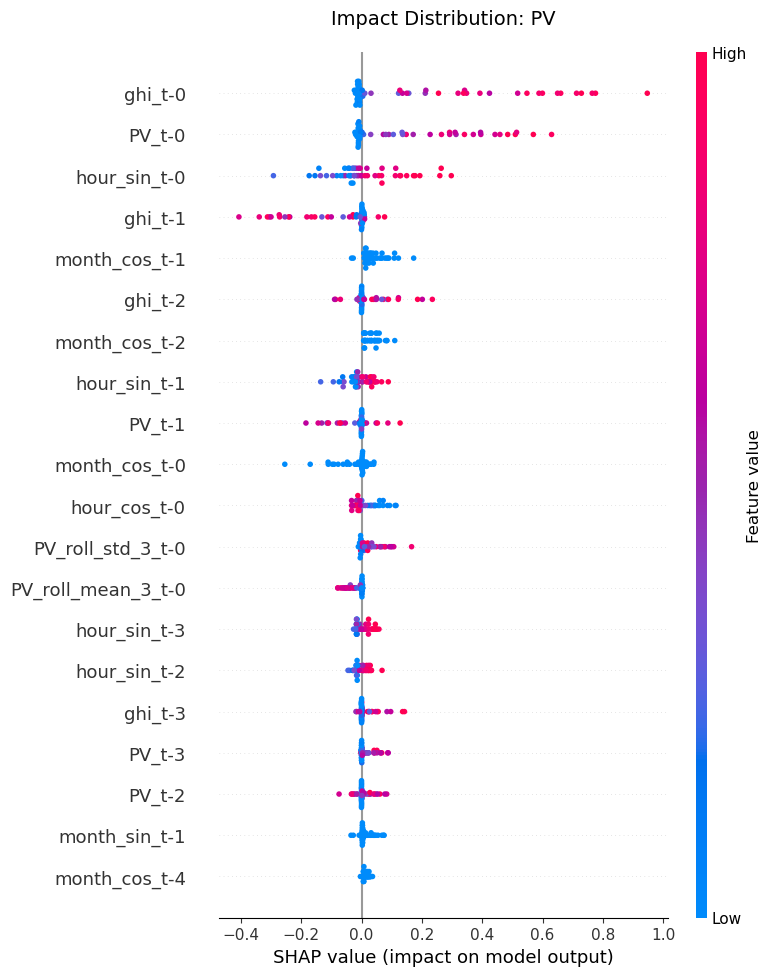

In [2]:

current_shap_raw = np.array(all_shap_dict[0])
s_flat, d_flat, names = get_flattened_data(current_shap_raw)
plt.figure(figsize=(10, 6))
shap.summary_plot(s_flat, d_flat, feature_names=names, show=False)
plt.title(f"Impact Distribution: PV", fontsize=14, pad=20)
plt.show()

### 2. Global Feature Importance
**What is this?** The mean absolute SHAP value for each feature.  
**What to focus on:** The length of the bar. It represents the "global" influence of a feature—how much it moves the prediction on average, regardless of direction.

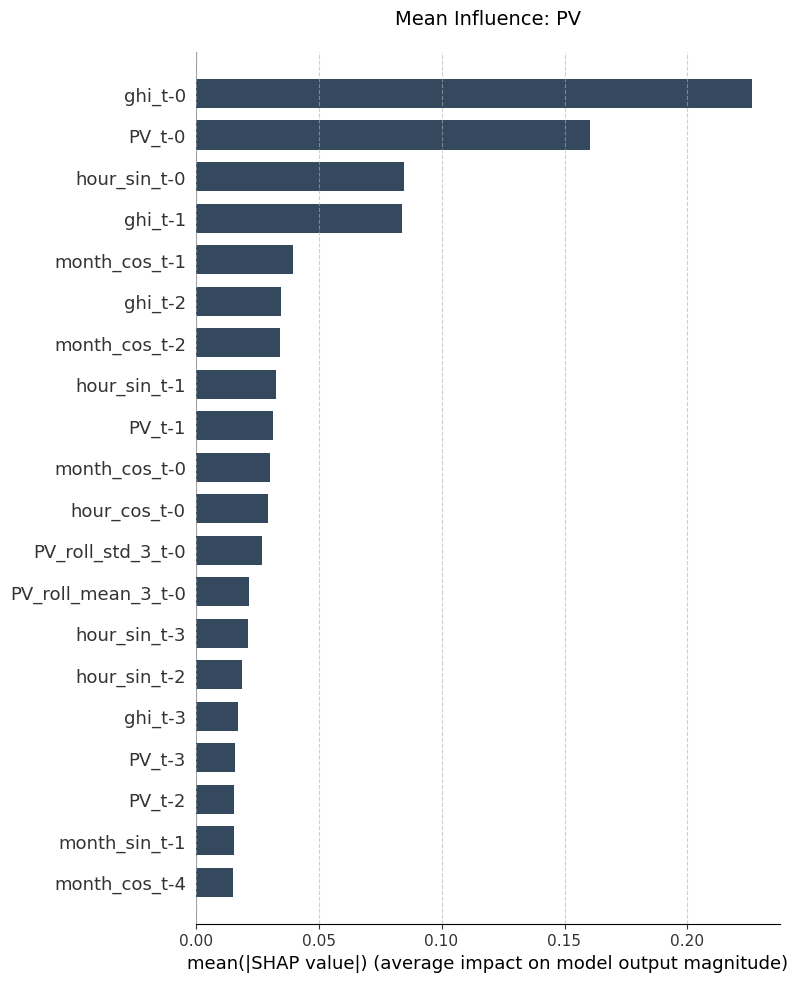

In [3]:

plt.figure(figsize=(10, 6))
shap.summary_plot(s_flat, d_flat, feature_names=names, plot_type='bar', show=False, color='#34495e')
plt.title(f"Mean Influence: PV", fontsize=14, pad=20)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

### 3. Temporal Relevance
**What is this?** A look at which time-steps in the `6` window are most influential.  
**What to focus on:** Does the model care more about the immediate past (`t-0`, `t-1`) or older history? A peak at `t-0` suggests a reactive model; a peak at `t-5` suggests a dependency on long-term trends.

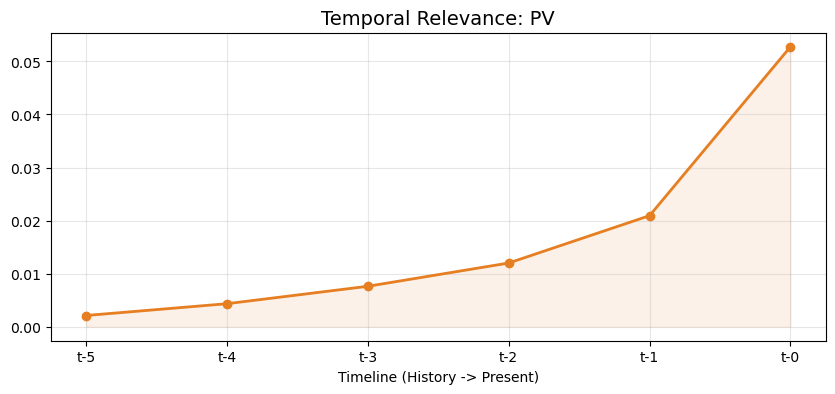

In [4]:

importance_per_step = np.abs(current_shap_raw).mean(axis=(0, 2)).flatten()
time_labels = [f"t-{i}" for i in range(look_back-1, -1, -1)]
time_axis = list(range(len(time_labels)))

plt.figure(figsize=(10, 4))
plt.plot(time_axis, importance_per_step, marker='o', linewidth=2, color='#e67e22')
plt.xticks(time_axis, time_labels)
plt.title(f"Temporal Relevance: PV", fontsize=14)
plt.xlabel("Timeline (History -> Present)")
plt.fill_between(time_axis, importance_per_step, alpha=0.1, color='#e67e22')
plt.grid(True, alpha=0.3)
plt.show()

### 4. Focused View: Top 5 Drivers
**What is this?** A high-precision look at the five most critical variables for `PV`.  
**What to focus on:** The gap between the 1st and 5th feature. If the 1st is much larger, the model is heavily reliant on a single "smoking gun" variable.

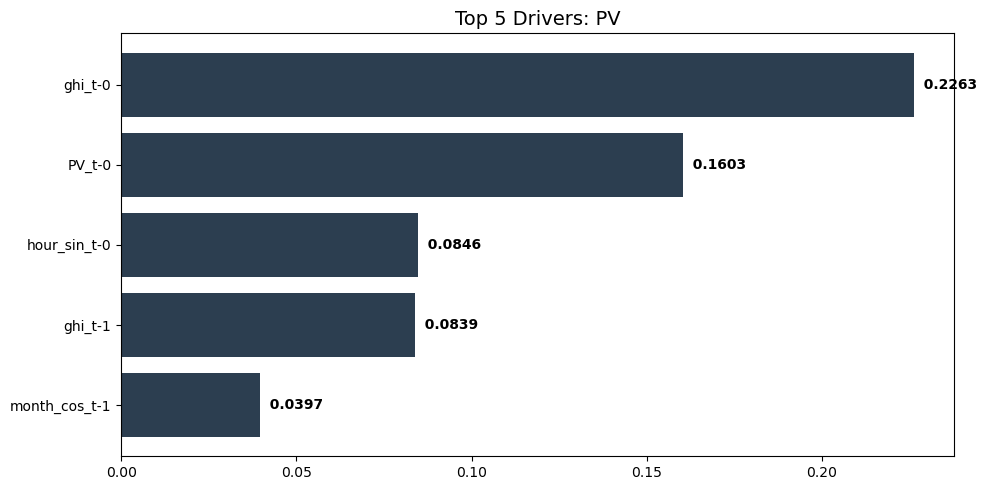

In [5]:

mean_shap = np.abs(s_flat).mean(axis=0)
sorted_idx = np.argsort(mean_shap)[-5:]
plt.figure(figsize=(10, 5))
plt.barh([names[i] for i in sorted_idx], mean_shap[sorted_idx], color='#2c3e50')
plt.title(f"Top 5 Drivers: PV", fontsize=14)
for i, v in enumerate(mean_shap[sorted_idx]):
    plt.text(v, i, f"  {v:.4f}", va='center', fontweight='bold')
plt.tight_layout()
plt.show()